# Info
Name:  

    ORACLES_AOD_4STAR_2017

Purpose:  

    Go through and compile statistics of AOD from 2017, centered on maps and histograms of ACAOD
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2018-06-04
             ported from the ORACLES_routine_AOD_4STAR python code
    

# Prepare the python environment


In [1]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

import hdf5storage as hs
from mpltools import color
from path_utils import getpath
from write_utils import nearest_neighbor
from tqdm import tqdm_notebook as tqdm
from plotting_utils import color_box

In [4]:
import scipy.stats as st
import Sun_utils as su

In [5]:
from mpl_toolkits.basemap import Basemap

In [6]:
fp = getpath('ORACLES')
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

In [7]:
vv = 'R1'

# Load files

## 4STAR ict

In [8]:
s = hs.loadmat(fp+'/aod_ict_2017/{vv}/all_aod_ict_{vv}_2017.mat'.format(vv=vv))

In [9]:
varname = s.keys()
varname.sort()
varname

[u'AOD0355',
 u'AOD0380',
 u'AOD0452',
 u'AOD0470',
 u'AOD0501',
 u'AOD0520',
 u'AOD0530',
 u'AOD0532',
 u'AOD0550',
 u'AOD0606',
 u'AOD0620',
 u'AOD0660',
 u'AOD0675',
 u'AOD0700',
 u'AOD0781',
 u'AOD0865',
 u'AOD1020',
 u'AOD1040',
 u'AOD1064',
 u'AOD1236',
 u'AOD1250',
 u'AOD1559',
 u'AOD1627',
 u'AOD1650',
 u'AOD_angstrom_470_865',
 u'AOD_polycoef_a0',
 u'AOD_polycoef_a1',
 u'AOD_polycoef_a2',
 u'GPS_Alt',
 u'Latitude',
 u'Longitude',
 u'Start_UTC',
 u'UNCAOD0355',
 u'UNCAOD0380',
 u'UNCAOD0452',
 u'UNCAOD0470',
 u'UNCAOD0501',
 u'UNCAOD0520',
 u'UNCAOD0530',
 u'UNCAOD0532',
 u'UNCAOD0550',
 u'UNCAOD0606',
 u'UNCAOD0620',
 u'UNCAOD0660',
 u'UNCAOD0675',
 u'UNCAOD0700',
 u'UNCAOD0781',
 u'UNCAOD0865',
 u'UNCAOD1020',
 u'UNCAOD1040',
 u'UNCAOD1064',
 u'UNCAOD1236',
 u'UNCAOD1250',
 u'UNCAOD1559',
 u'UNCAOD1627',
 u'UNCAOD1650',
 u'amass_aer',
 u'days',
 u'fl',
 u'fl1',
 u'fl2',
 u'fl3',
 u'fl_QA',
 u'fl_alt',
 u'fl_alt_18',
 u'fl_alt_22',
 u'fl_alt_6',
 u'fl_routine',
 u'flac',
 u'fl

In [10]:
days_nums = np.unique(s['days'])

In [11]:
len(s['fl_QA'])

520078

In [12]:
days_nums

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.])

In [13]:
days = ['20170801','20170802','20170807','20170809', '20170812','20170813',
        '20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']

In [14]:
s['fl_acaod'] = (s['flag_acaod']==1) & s['fl_QA']

In [15]:
len(s['fl_acaod'])

520078

In [16]:
len(s['fl_QA'])

520078

In [17]:
s['fl_below5'] = (s['fl_QA']) & (s['GPS_Alt']<5000.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


# Subset for routine flight

In [25]:
len(s['flacr'])

520078

In [28]:
days[1],days[3],days[8],days[10],days[11]

('20170802', '20170809', '20170818', '20170821', '20170824')

In [29]:
d_rtn = ['20170802','20170809','20170818','20170821','20170824']

In [30]:
d_rtnf = [20170802.0,20170809.0,20170818.0,20170821.0,20170824.0]

In [31]:
d_irtn = [1.0,3.0,8.0,10.0,11.0]

In [34]:
s['fl_rtn'] = s['flr']

In [35]:
s['fl_rtna'] = s['flacr']

In [42]:
s['UNCAOD0501'][s['UNCAOD0501']>100.0] = np.nan

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [43]:
np.nanmean(s['UNCAOD0501'][s['fl_acaod']]), np.nanmean(s['UNCAOD0501']), np.nanmean(s['UNCAOD0501'])/np.nanmean(s['AOD0501']) 

(0.021390938589111893, 0.10304036020940198, 0.16495200482220634)

In [44]:
np.nanmedian(s['UNCAOD0501'][s['fl_acaod']]), np.nanmedian(s['UNCAOD0501']), np.nanmedian(s['UNCAOD0501'])/np.nanmedian(s['AOD0501'])

(0.017000000000000001, 0.014999999999999999, 0.41666666666666669)

In [45]:
np.nanmean(s['UNCAOD0501'][s['fl_acaod']])/np.nanmean(s['AOD0501'][s['fl_acaod']])

0.057202416399043186

In [46]:
np.nanmean(s['UNCAOD1020'][s['fl_acaod']]), np.nanmean(s['UNCAOD1020']), np.nanmean(s['UNCAOD1020'])/np.nanmean(s['AOD1020']) 

(0.012784594186733157, 0.11059906173473087, 0.40347127004646005)

In [49]:
s['fl_alt12'] = (s['GPS_Alt']>=600)&(s['GPS_Alt']<1200)
s['fl_alt16'] = (s['GPS_Alt']>=500)&(s['GPS_Alt']<1600)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [50]:
s['fl_alt12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [51]:
s['fl_rtn_12'] = s['fl_alt12'] & s['fl_QA'] & s['fl_rtn']
s['fl_rtn_16'] = s['fl_alt16'] & s['fl_QA'] & s['fl_rtn']


In [52]:
s['fl_rtn_12']

array([False, False, False, ..., False, False, False], dtype=bool)

In [60]:
flr2 = s['fl_rtn_16']&(s['days']==d_rtnf[0])
flr4 = s['fl_rtn_16']&(s['days']==d_rtnf[1])
flr6 = s['fl_rtn_16']&(s['days']==d_rtnf[2])
flr7 = s['fl_rtn_16']&(s['days']==d_rtnf[3])
flr8 = s['fl_rtn_16']&(s['days']==d_rtnf[4])
flr13 = s['fl_rtn_16']&(s['days']==d_rtnf[5])

In [61]:
fr2 = s['fl_rtn']&(s['days']==d_rtnf[0])
fr4 = s['fl_rtn']&(s['days']==d_rtnf[1])
fr6 = s['fl_rtn']&(s['days']==d_rtnf[2])
fr7 = s['fl_rtn']&(s['days']==d_rtnf[3])
fr8 = s['fl_rtn']&(s['days']==d_rtnf[4])
fr13 = s['fl_rtn']&(s['days']==d_rtnf[5])

In [62]:
fr = [fr2,fr4,fr6,fr7,fr8,fr13]
flr = [flr2,flr4,flr6,flr7,flr8,flr13]

In [63]:
flr2

array([False, False, False, ..., False, False, False], dtype=bool)

In [64]:
flr2a = s['fl_rtna']&(s['days']==d_rtnf[0])
flr4a = s['fl_rtna']&(s['days']==d_rtnf[1])
flr6a = s['fl_rtna']&(s['days']==d_rtnf[2])
flr7a = s['fl_rtna']&(s['days']==d_rtnf[3])
flr8a = s['fl_rtna']&(s['days']==d_rtnf[4])
flr13a = s['fl_rtna']&(s['days']==d_rtnf[5])

In [65]:
fr2a = s['fl_rtna']&(s['days']==d_rtnf[0])
fr4a = s['fl_rtna']&(s['days']==d_rtnf[1])
fr6a = s['fl_rtna']&(s['days']==d_rtnf[2])
fr7a = s['fl_rtna']&(s['days']==d_rtnf[3])
fr8a = s['fl_rtna']&(s['days']==d_rtnf[4])
fr13a = s['fl_rtna']&(s['days']==d_rtnf[5])

In [66]:
fra = [fr2a,fr4a,fr6a,fr7a,fr8a,fr13a]
flra = [flr2a,flr4a,flr6a,flr7a,flr8a,flr13a]

In [53]:
cls = ['green','blue','yellow','cyan','magenta','orange']

In [69]:
s['fl_alt_6'] = (s['GPS_Alt']<=600)
s['fl_rtn_6'] = s['fl_alt_6'] & s['fl_QA'] & fl
flrr2 = s['fl_rtn_6']&(s['days']==2.0)
flrr4 = s['fl_rtn_6']&(s['days']==4.0)
flrr6 = s['fl_rtn_6']&(s['days']==6.0)
flrr7 = s['fl_rtn_6']&(s['days']==7.0)
flrr8 = s['fl_rtn_6']&(s['days']==8.0)
flrr13 = s['fl_rtn_6']&(s['days']==13.0)
flrr = [flrr2,flrr4,flrr6,flrr7,flrr8,flrr13]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


# Plot Histograms of measured AOD and angstrom

## Plot histograms of ACAOD sampled at various altitudes

<IPython.core.display.Javascript object>


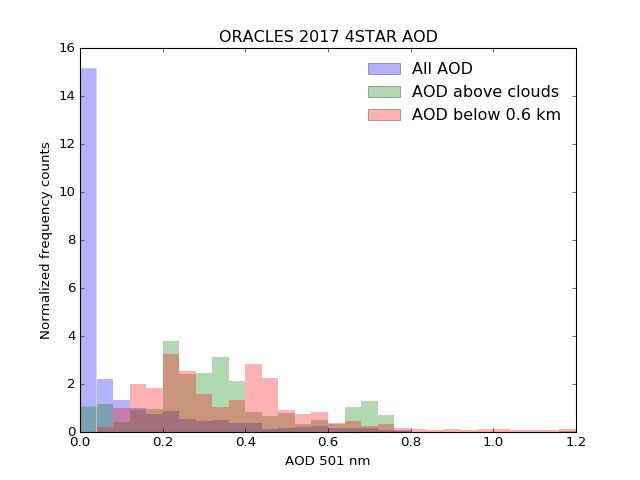

In [55]:
plt.figure()
plt.hist(s['AOD0501'][s['fl_QA']],bins=30,range=(0,1.2),edgecolor='None',label='All AOD',alpha=0.3,normed=True)
plt.hist(s['AOD0501'][s['fl_acaod']],bins=30,range=(0,1.2),edgecolor='None',label='AOD above clouds',alpha=0.3,normed=True)
plt.hist(s['AOD0501'][s['fl_alt_6']],bins=30,range=(0,1.2),edgecolor='None',label='AOD below 0.6 km',alpha=0.3,normed=True)

plt.xlabel('AOD 501 nm')
plt.ylabel('Normalized frequency counts')
plt.title('ORACLES 2017 4STAR AOD')
plt.legend(frameon=False)


In [57]:
s['fl6'] = s['fl_alt_6'] & s['fl_QA']

<IPython.core.display.Javascript object>


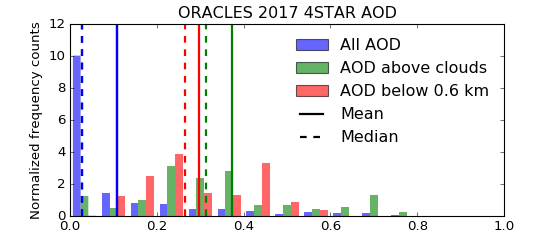

In [58]:
plt.figure(figsize=(7,3))
plt.hist([s['AOD0501'][s['fl_QA']],s['AOD0501'][s['fl_acaod']],s['AOD0501'][s['fl6']]], 
         bins=15,range=(0,1.0),edgecolor='None',label=['All AOD','AOD above clouds','AOD below 0.6 km'],alpha=0.6,normed=True)
#plt.hist(s['AOD0501'][s['fl_acaod']],bins=30,range=(0,1.2),edgecolor='None',label='AOD above clouds',alpha=0.3,normed=True)
#plt.hist(s['AOD0501'][s['fl_alt_6']],bins=30,range=(0,1.2),edgecolor='None',label='AOD below 0.6 km',alpha=0.3,normed=True)

plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_QA']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_QA']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')


plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_QA']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD0501'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_QA']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2,ls='--')

plt.xlabel('AOD 501 nm')
plt.ylabel('Normalized frequency counts')
plt.title('ORACLES 2017 4STAR AOD')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,4,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False)
#plt.legend(frameon=False)

plt.savefig(fp+'plot_v2/ORACLES2017_4STAR_AOD501_histogram.png',
            transparent=True,dpi=500)

## Now get the angstrom

In [81]:
nn = s.keys()
nn.sort()

In [82]:
wvl = np.array([float(i[-4:]) for i in nn[0:24]])

In [83]:
aods = np.array([s[i] for i in nn[0:24]]).T

In [84]:
aods.shape

(520078, 24)

In [85]:
uncaods = np.array([s[i] for i in nn[28:28+24]]).T

In [76]:
awvl = [380.0,470.0,500.0,530.0,660.0,865.0,1250.0]

In [80]:
s['angs_470_865'] = s['AOD_angstrom_470_865']

## Plot the histogram of angstrom exponent

<IPython.core.display.Javascript object>


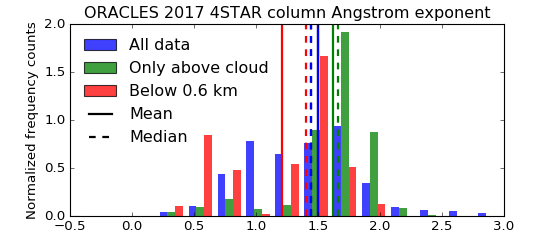

In [86]:
plt.figure(figsize=(7,3))
plt.hist([s['angs_470_865'][s['fl_QA']],s['angs_470_865'][s['fl_acaod']],s['angs_470_865'][s['fl6']]],
        bins=15,range=[-0.5,3.0],label=['All data','Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=True)
plt.ylabel('Normalized frequency counts')
plt.xlabel('Angstrom at 500 nm')
plt.title('ORACLES 2017 4STAR column Angstrom exponent')

plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl_QA']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl_QA']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl_QA']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl_QA']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2,ls='--')

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,4,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc=0)
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_angstrom_histogram.png',
            transparent=True,dpi=500)

In [87]:
np.nanmean(s['angs_470_865'][s['fl_acaod']]), np.nanmedian(s['angs_470_865'][s['fl_acaod']]), np.nanstd(s['angs_470_865'][s['fl_acaod']]),len(s['angs_470_865'][s['fl_acaod']])

(1.6245407434095958, 1.6639999999999999, 0.33870933596231978, 16653)

In [63]:
s['fl_both'] = s['fl_acaod'] | s['fl6']

In [72]:
np.nanmean(s['AOD0501'][s['fl_acaod']]), np.nanmedian(s['AOD0501'][s['fl_acaod']]), np.nanstd(s['AOD0501'][s['fl_acaod']]),len(s['AOD0501'][s['fl_acaod']])

(0.37395166036149646, 0.313, 0.26423493138937526, 16653)

In [73]:
np.nanmean(s['AOD0501'][s['fl6']]), np.nanmedian(s['AOD0501'][s['fl6']]), np.nanstd(s['AOD0501'][s['fl6']]),len(s['AOD0501'][s['fl6']])

(0.29666520526106022, 0.26400000000000001, 0.12754434481133081, 5018)

In [94]:
np.nanmean(s['AOD0501'][s['fl_both']]), np.nanmedian(s['AOD0501'][s['fl_both']]), np.nanstd(s['AOD0501'][s['fl_both']]),len(s['AOD0501'][s['fl_both']])

(0.32349162963852529, 0.32700000000000001, 0.21156778495080086, 41739)

### Combine histogram of AOD at 2 wavelengths

<IPython.core.display.Javascript object>


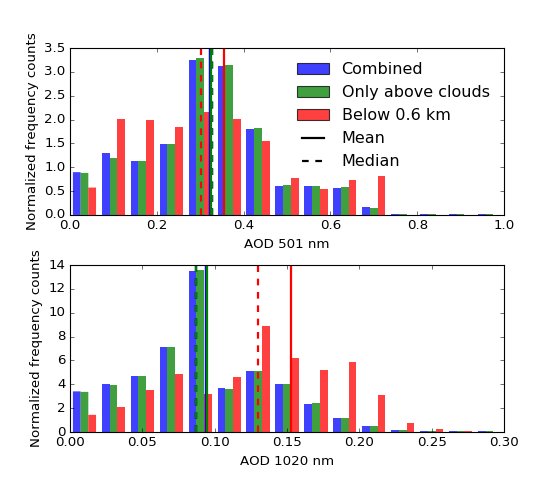

In [174]:
fig = plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
plt.hist([s['AOD0501'][s['fl_both']],s['AOD0501'][s['fl_acaod']],s['AOD0501'][s['fl6']]], 
         bins=15,range=(0,1.0),edgecolor='None',label=['Combined','Only above clouds','Below 0.6 km'],alpha=0.75,normed=True)
#plt.hist(s['AOD0501'][s['fl_acaod']],bins=30,range=(0,1.2),edgecolor='None',label='AOD above clouds',alpha=0.3,normed=True)
#plt.hist(s['AOD0501'][s['fl_alt_6']],bins=30,range=(0,1.2),edgecolor='None',label='AOD below 0.6 km',alpha=0.3,normed=True)

plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')


plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_both']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD0501'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_both']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2,ls='--')

plt.xlabel('AOD 501 nm')
plt.ylabel('Normalized frequency counts')
#plt.title('ORACLES 2016 4STAR AOD')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,4,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False)
#plt.legend(frameon=False)

fig.subplots_adjust(hspace=.3)
plt.subplot(2,1,2)
plt.hist([s['AOD1020'][s['fl_both']],s['AOD1020'][s['fl_acaod']],s['AOD1020'][s['fl6']]],
        bins=15,range=[0.0,0.3],label=['Combined','Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=True)
plt.xlim(0.0,0.3)
plt.ylabel('Normalized frequency counts')
plt.xlabel('AOD 1020 nm')
#plt.title('ORACLES 4STAR column Angstrom exponent')

plt.axvline(x=np.nanmean(s['AOD1020'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

plt.axvline(x=np.nanmean(s['AOD1020'][s['fl_both']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD1020'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD1020'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl_both']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl_acaod']]),color='g',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl6']]),color='r',ymin=0, ymax=10,lw=2,ls='--')

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [2,3,4,0,1]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc=0)

plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_AOD_2wvl_histogram_comb.png',
            transparent=True,dpi=500)

Print out the mean, median, std, and number of samples for 1020 nm the - acaod, below 0.6 km, and combine below cloud and acaod

In [69]:
np.nanmean(s['AOD1020'][s['fl_acaod']]), np.nanmedian(s['AOD1020'][s['fl_acaod']]), np.nanstd(s['AOD1020'][s['fl_acaod']]),len(s['AOD1020'][s['fl_acaod']])

(0.10110256410256412, 0.086999999999999994, 0.074827349572631291, 16653)

In [70]:
np.nanmean(s['AOD1020'][s['fl6']]), np.nanmedian(s['AOD1020'][s['fl6']]), np.nanstd(s['AOD1020'][s['fl6']]),len(s['AOD1020'][s['fl6']])

(0.12400585896631093, 0.11700000000000001, 0.04499352406484039, 5018)

In [71]:
np.nanmean(s['AOD1020'][s['fl_both']]), np.nanmedian(s['AOD1020'][s['fl_both']]), np.nanstd(s['AOD1020'][s['fl_both']]),len(s['AOD1020'][s['fl_both']])

(0.10633616187989557, 0.091999999999999998, 0.069671146165138934, 21559)

### Combined histogram at 2 wvl, in stacked bars

<IPython.core.display.Javascript object>


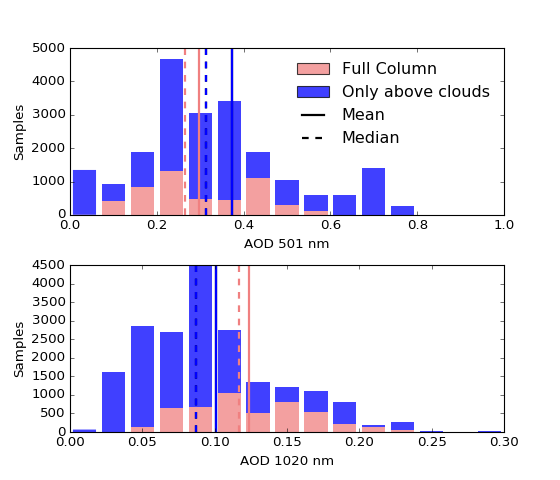

In [68]:
fig = plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
#plt.hist([s['AOD0501'][s['fl_both']],s['AOD0501'][s['fl_acaod']],s['AOD0501'][s['fl6']]], 
#         bins=15,range=(0,1.0),edgecolor='None',label=['Combined','Only above clouds','Below 0.6 km'],alpha=0.75,normed=True)
#plt.hist(s['AOD0501'][s['fl_acaod']],bins=30,range=(0,1.2),edgecolor='None',label='AOD above clouds',alpha=0.3,normed=True)
#plt.hist(s['AOD0501'][s['fl_alt_6']],bins=30,range=(0,1.2),edgecolor='None',label='AOD below 0.6 km',alpha=0.3,normed=True)
plt.hist([s['AOD0501'][s['fl6']],s['AOD0501'][s['fl_acaod']]], bins=15,range=(0,1.0),color=['lightcoral','b'],histtype='bar',
         edgecolor='None',label=['Full Column','Only above clouds'],alpha=0.75,normed=False,stacked=True)


plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_acaod']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_acaod']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')


#plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD0501'][s['fl_acaod']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD0501'][s['fl6']]),color='lightcoral',ymin=0, ymax=10,lw=2)

#plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl_acaod']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD0501'][s['fl6']]),color='lightcoral',ymin=0, ymax=10,lw=2,ls='--')

plt.xlabel('AOD 501 nm')
plt.ylabel('Samples')
#plt.title('ORACLES 2016 4STAR AOD')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False)
#plt.legend(frameon=False)

fig.subplots_adjust(hspace=.3)
plt.subplot(2,1,2)
#plt.hist([s['AOD1020'][s['fl_both']],s['AOD1020'][s['fl_acaod']],s['AOD1020'][s['fl6']]],
#        bins=15,range=[0.0,0.3],label=['Combined','Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=True)
plt.hist([s['AOD1020'][s['fl6']],s['AOD1020'][s['fl_acaod']]],color=['lightcoral','b'],histtype='bar',
        bins=15,range=[0.0,0.3],label=['Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=False,stacked=True)
plt.xlim(0.0,0.3)
plt.ylabel('Samples')
plt.xlabel('AOD 1020 nm')
#plt.title('ORACLES 4STAR column Angstrom exponent')

plt.axvline(x=np.nanmean(s['AOD1020'][s['fl_acaod']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl_acaod']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

#plt.axvline(x=np.nanmean(s['AOD1020'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD1020'][s['fl_acaod']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['AOD1020'][s['fl6']]),color='lightcoral',ymin=0, ymax=10,lw=2)

#plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl_acaod']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['AOD1020'][s['fl6']]),color='lightcoral',ymin=0, ymax=10,lw=2,ls='--')

#handles, labels = plt.gca().get_legend_handles_labels()
#order = [2,3,4,0,1]
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc=0)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_AOD_2wvl_histogram_stack.png',
            transparent=True,dpi=500)

## Create a histogram of Angstrom at 2 wavelengths

In [74]:
ia = 4 #660 nm
ib = 2 #500 nm

In [75]:
awvl

NameError: name 'awvl' is not defined

<IPython.core.display.Javascript object>


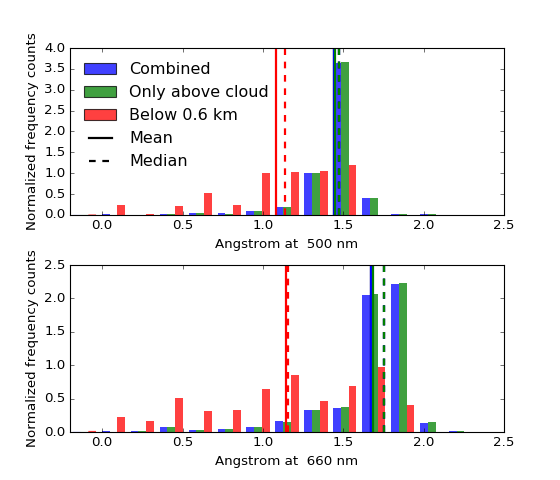

In [202]:
fig = plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
plt.hist([s['angs'][s['fl_both'],ib],s['angs'][s['fl_acaod'],ib],s['angs'][s['fl6'],ib]],
        bins=15,range=[-0.2,2.5],label=['Combined','Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=True)
plt.xlim(-0.2,2.5)
#plt.hist(s['AOD0501'][s['fl_acaod']],bins=30,range=(0,1.2),edgecolor='None',label='AOD above clouds',alpha=0.3,normed=True)
#plt.hist(s['AOD0501'][s['fl_alt_6']],bins=30,range=(0,1.2),edgecolor='None',label='AOD below 0.6 km',alpha=0.3,normed=True)

plt.axvline(x=np.nanmean(s['angs'][s['fl_both'],ib]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['angs'][s['fl_both'],ib]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

plt.axvline(x=np.nanmean(s['angs'][s['fl_both'],ib]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs'][s['fl_acaod'],ib]),color='g',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs'][s['fl6'],ib]),color='r',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['angs'][s['fl_both'],ib]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs'][s['fl_acaod'],ib]),color='g',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs'][s['fl6'],ib]),color='r',ymin=0, ymax=10,lw=2,ls='--')


plt.xlabel('Angstrom at {:4.0f} nm'.format(awvl[ib]))
plt.ylabel('Normalized frequency counts')
#plt.title('ORACLES 2016 4STAR AOD')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,4,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc=0)
#plt.legend(frameon=False)

fig.subplots_adjust(hspace=.3)
plt.subplot(2,1,2)
plt.hist([s['angs'][s['fl_both'],ia],s['angs'][s['fl_acaod'],ia],s['angs'][s['fl6'],ia]],
        bins=15,range=[-0.2,2.5],label=['Combined','Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=True)
plt.xlim(-0.2,2.5)
plt.ylabel('Normalized frequency counts')
plt.xlabel('Angstrom at {:4.0f} nm'.format(awvl[ia]))
#plt.title('ORACLES 4STAR column Angstrom exponent')

plt.axvline(x=np.nanmean(s['angs'][s['fl_both'],ia]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['angs'][s['fl_both'],ia]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

plt.axvline(x=np.nanmean(s['angs'][s['fl_both'],ia]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs'][s['fl_acaod'],ia]),color='g',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs'][s['fl6'],ia]),color='r',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['angs'][s['fl_both'],ia]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs'][s['fl_acaod'],ia]),color='g',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs'][s['fl6'],ia]),color='r',ymin=0, ymax=10,lw=2,ls='--')


plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_Angstrom_2wvl_histogram_comb.png',
            transparent=True,dpi=500)

### Remake the angstrom histogram as stacked bars , one with old method, and one with polyfit

<IPython.core.display.Javascript object>


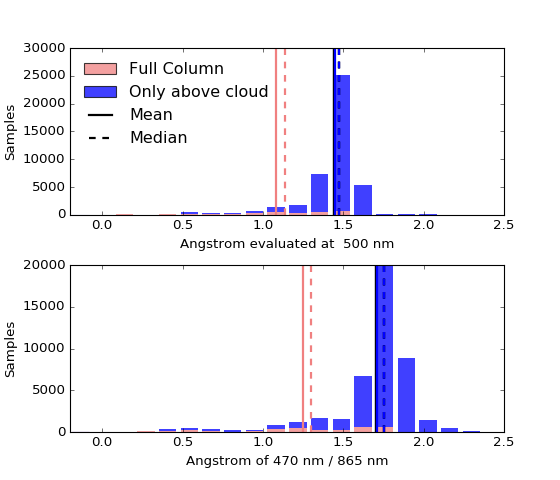

In [108]:
fig = plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
plt.hist([s['angs'][s['fl6'],ib],s['angs'][s['fl_acaod'],ib]],stacked=True,color=['lightcoral','b'],
        bins=20,range=[-0.2,2.5],label=['Full Column','Only above cloud'],edgecolor='None',alpha=0.75,normed=False)
plt.xlim(-0.2,2.5)
#plt.hist(s['AOD0501'][s['fl_acaod']],bins=30,range=(0,1.2),edgecolor='None',label='AOD above clouds',alpha=0.3,normed=True)
#plt.hist(s['AOD0501'][s['fl_alt_6']],bins=30,range=(0,1.2),edgecolor='None',label='AOD below 0.6 km',alpha=0.3,normed=True)

plt.axvline(x=np.nanmean(s['angs'][s['fl_both'],ib]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['angs'][s['fl_both'],ib]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

plt.axvline(x=np.nanmean(s['angs'][s['fl_both'],ib]),color='k',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs'][s['fl_acaod'],ib]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs'][s['fl6'],ib]),color='lightcoral',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['angs'][s['fl_both'],ib]),color='k',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs'][s['fl_acaod'],ib]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs'][s['fl6'],ib]),color='lightcoral',ymin=0, ymax=10,lw=2,ls='--')


plt.xlabel('Angstrom evaluated at {:4.0f} nm'.format(awvl[ib]))
plt.ylabel('Samples')
#plt.title('ORACLES 2016 4STAR AOD')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc=0)
#plt.legend(frameon=False)

fig.subplots_adjust(hspace=.3)
plt.subplot(2,1,2)
plt.hist([s['angs_470_865'][s['fl6']],s['angs_470_865'][s['fl_acaod']]],color=['lightcoral','b'],stacked=True,
        bins=20,range=[-0.2,2.5],label=['Only above cloud','Below 0.6 km'],edgecolor='None',alpha=0.75,normed=False)
plt.xlim(-0.2,2.5)
plt.ylabel('Samples')
plt.xlabel('Angstrom of 470 nm / 865 nm'.format(awvl[ia]))
#plt.title('ORACLES 4STAR column Angstrom exponent')

plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,label='Mean')
plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,ls='--',label='Median')

plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl_acaod']]),color='b',ymin=0, ymax=10,lw=2)
plt.axvline(x=np.nanmean(s['angs_470_865'][s['fl6']]),color='lightcoral',ymin=0, ymax=10,lw=2)

plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl_both']]),color='k',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl_acaod']]),color='b',ymin=0, ymax=10,lw=2,ls='--')
plt.axvline(x=np.nanmedian(s['angs_470_865'][s['fl6']]),color='lightcoral',ymin=0, ymax=10,lw=2,ls='--')


plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_Angstrom_2wvl_histogram_stacked.png',
            transparent=True,dpi=500)

In [201]:
np.nanmean(s['angs_470_865'][s['fl_acaod']])

1.6245407434095958

In [89]:
np.nanmedian(s['angs_470_865'][s['fl_acaod']])

1.6639999999999999

In [90]:
np.nanstd(s['angs_470_865'][s['fl_acaod']])

0.33870933596231978

In [202]:
np.nanmean(s['angs_470_865'][s['fl6']]),np.nanmedian(s['angs_470_865'][s['fl6']]),np.nanstd(s['angs_470_865'][s['fl6']])

(1.208012754085293, 1.403, 0.4447880165538815)

In [30]:
np.nanmean(s['angs'][s['fl_acaod'],ib]),np.nanmean(s['angs'][s['fl6'],ib])

KeyError: 'angs'

## Get vertical dependence of Angstrom exponent

In [94]:
s['fl_QA_angs'] = s['fl_QA'] & (s['AOD0501']>0.1) & (s['angs_470_865']<2.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [98]:
s['fl_QA_angs_aca'] = s['fl_acaod'] & (s['AOD0501']>0.1) & (s['GPS_Alt']>300.0) & (s['angs_470_865']<2.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


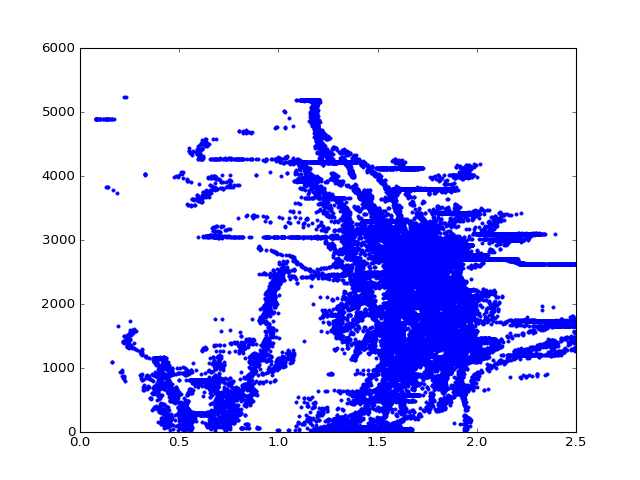

In [96]:
plt.figure()
plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.')

In [99]:
binned_ang,binned_alt,binned_num,binned_ndays = [],[],[],[]
for i in xrange(70):
    flaa = (s['GPS_Alt'][s['fl_QA_angs']]>=i*100.0) & (s['GPS_Alt'][s['fl_QA_angs']]<(i+1.0)*100.0)
    binned_ang.append(s['angs_470_865'][s['fl_QA_angs']][flaa])
    binned_alt.append(np.mean([i*100.0,(i+1.0)*100.0]))
    binned_num.append(len(s['angs_470_865'][s['fl_QA_angs']][flaa]))
    binned_ndays.append(len(np.unique(s['days'][s['fl_QA_angs']][flaa])))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
binned_angc,binned_altc,binned_numc,binned_ndaysc = [],[],[],[]
for i in xrange(70):
    flaa = (s['GPS_Alt'][s['fl_QA_angs_aca']]>=i*100.0) & (s['GPS_Alt'][s['fl_QA_angs_aca']]<(i+1.0)*100.0)
    binned_angc.append(s['angs_470_865'][s['fl_QA_angs_aca']][flaa])
    binned_altc.append(np.mean([i*100.0,(i+1.0)*100.0]))
    binned_numc.append(len(s['angs_470_865'][s['fl_QA_angs_aca']][flaa]))
    binned_ndaysc.append(len(np.unique(s['days'][s['fl_QA_angs_aca']][flaa])))

In [103]:
max(binned_ndaysc)*1.0

11.0

<IPython.core.display.Javascript object>


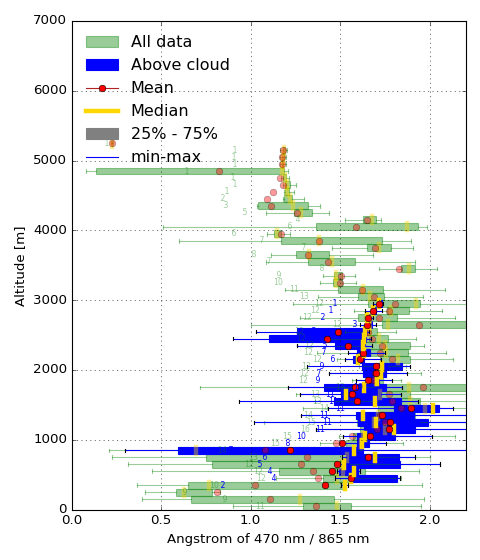

In [104]:
plt.figure(figsize=(6,7))
bp =plt.boxplot(binned_ang,positions=binned_alt,vert=False,showfliers=False,widths=100,showmeans=True,patch_artist=True)
plt.xlabel('Angstrom of 470 nm / 865 nm')
plt.ylabel('Altitude [m]')
#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
for b in bp['boxes']:
    b.set_facecolor('green')
    b.set_edgecolor('green')
    b.set_alpha(0.4)
for b in bp['means']:
    b.set_marker('o')
    b.set_color('firebrick')
    b.set_alpha(0.4)
for b in bp['whiskers']:
    b.set_linestyle('-')
    b.set_color('green')
    b.set_alpha(0.4)
for b in bp['caps']:
    b.set_alpha(0.4)
    b.set_color('green')
for b in bp['medians']:
    b.set_linewidth(4)
    b.set_color('gold')
    b.set_alpha(0.4)
    
bpc =plt.boxplot(binned_angc,positions=binned_altc,vert=False,showfliers=False,widths=100,showmeans=True,patch_artist=True)
for b in bpc['boxes']:
    b.set_facecolor('blue')
    b.set_edgecolor('blue')
for b in bpc['means']:
    b.set_marker('o')
    b.set_color('firebrick')
for b in bpc['whiskers']:
    b.set_linestyle('-')
for b in bpc['medians']:
    b.set_linewidth(4)
    b.set_color('gold')
bpc['boxes'][0].set_color('grey')
ax = plt.gca()
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,2.2)
plt.grid()
for j,nn in enumerate(binned_ndays): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])*0.75,binned_alt[j],'{:2.0f}'.format(nn),alpha=0.4,color='g',fontsize=7,verticalalignment='center')
for j,nn in enumerate(binned_ndaysc): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])*0.8,binned_altc[j],'{:2.0f}'.format(nn),color='b',fontsize=7,verticalalignment='center')

plt.legend([bp['boxes'][0],bpc['boxes'][1],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['All data','Above cloud','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=2,numpoints=1)
plt.tight_layout()

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_Angstrom_2wvl_vertical.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


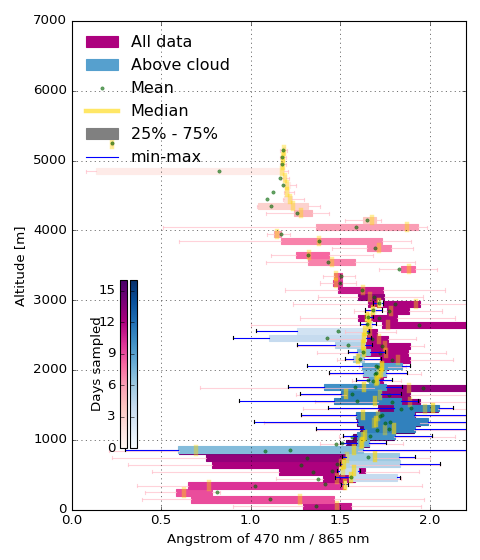

/usr/lib/python2.7/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [105]:
plt.figure(figsize=(6,7))
bp =plt.boxplot(binned_ang,positions=np.array(binned_alt)-5.0,vert=False,
                showfliers=False,widths=90,showmeans=True,patch_artist=True)
plt.xlabel('Angstrom of 470 nm / 865 nm')
plt.ylabel('Altitude [m]')
#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
gr = plt.cm.RdPu
bl = plt.cm.Blues
bndm = np.nanmax(binned_ndays)*1.0
for j,b in enumerate(bp['boxes']):
    b.set_facecolor(gr(binned_ndays[j]*1.0/bndm))
    b.set_edgecolor(gr(binned_ndays[j]*1.0/bndm))
    #b.set_alpha(0.4)
for j,b in enumerate(bp['means']):
    b.set_marker('.')
    b.set_color('None')
    b.set_markerfacecolor('darkgreen')
    b.set_markeredgecolor('darkgreen')
    b.set_alpha(0.6)
for j,b in enumerate(bp['whiskers']):
    b.set_linestyle('-')
    b.set_color('pink') #gr(binned_ndays[j]*1.0/bndm))
    b.set_alpha(0.7)
for j,b in enumerate(bp['caps']):
    b.set_alpha(0.7)
    b.set_color('pink')#gr(binned_ndays[j]*1.0/bndm))
for j,b in enumerate( bp['medians']):
    b.set_linewidth(4)
    b.set_color('gold')
    b.set_alpha(0.4)
    
bpc =plt.boxplot(binned_angc,positions=np.array(binned_altc)+10.0,vert=False,
                 showfliers=False,widths=90,showmeans=True,patch_artist=True)
for j,b in enumerate(bpc['boxes']):
    b.set_facecolor(bl(binned_ndaysc[j]*1.0/bndm)) #'blue')
    b.set_edgecolor(bl(binned_ndaysc[j]*1.0/bndm))
for b in bpc['means']:
    b.set_marker('.')
    b.set_color('None')
    b.set_markerfacecolor('darkgreen')
    b.set_markeredgecolor('darkgreen')
    b.set_alpha(0.6)
for b in bpc['whiskers']:
    b.set_linestyle('-')
for b in bpc['medians']:
    b.set_linewidth(4)
    b.set_color('gold')
    b.set_alpha(0.6)
bpc['boxes'][0].set_color('grey')
ax = plt.gca()
plt.ylim(0,7000)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
ax.set_yticklabels([0,1000,2000,3000,4000,5000,6000,7000])
plt.xlim(0,2.2)
plt.grid()
plt.legend([bp['boxes'][5],bpc['boxes'][18],bpc['means'][0],bpc['medians'][0],bpc['boxes'][0],bpc['whiskers'][0]],
           ['All data','Above cloud','Mean','Median','25% - 75%','min-max'],
           frameon=False,loc=2,numpoints=1)

scalarmapgr = plt.cm.ScalarMappable(cmap=gr)
scalarmapgr.set_array(binned_ndays)
scalarmapbl = plt.cm.ScalarMappable(cmap=bl)
scalarmapbl.set_array(binned_ndays)
cbaxesgr = plt.gcf().add_axes([0.25, 0.2, 0.015, 0.3])
cbg = plt.colorbar(scalarmapgr,cax=cbaxesgr)
cbaxesbl = plt.gcf().add_axes([0.27, 0.2, 0.015, 0.3])
cbb = plt.colorbar(scalarmapbl,cax=cbaxesbl)
cbg.set_ticks([0,3,6,9,12,15])
#cbg.ax.yaxis.set_ticks_position('right')
#cbg.set_ticklabels(['0','3','6','9','12','15'],horizontalalignment='left')
cbb.set_ticks([0,3,6,9,12,15]),cbb.set_ticklabels(['','','','',''])#,cbg.set_label('Days sampled',verticalalignment='top')
cbaxesgr.yaxis.set_ticks_position('left'),cbaxesbl.yaxis.set_ticks_position('left')
cbaxesgr.text(-4.0,0.5,'Days sampled',rotation=90,verticalalignment='center')

plt.tight_layout()

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_Angstrom_2wvl_vertical_cb.png',
            transparent=True,dpi=500)

# Make some figures of the map statistic distribution

## plot a map of the mean, median, and std of the AOD

In [124]:
a,xe,ye,bn = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],s['Longitude'][s['fl_acaod']],s['AOD0501'][s['fl_acaod']],
                           bins=26,range=[[-15,2],[-16,8]])
a = np.ma.masked_array(a,np.isnan(a))

In [125]:
xe[1]-xe[0]

0.6538461538461533

In [126]:
ye[1]-ye[0]

0.92307692307692335

<IPython.core.display.Javascript object>


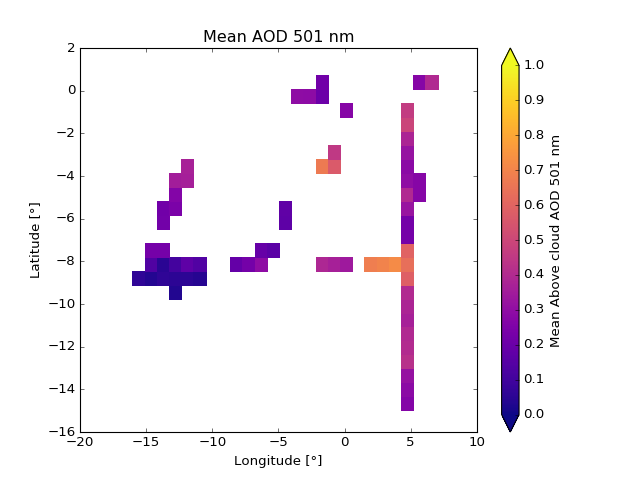

In [127]:
plt.figure()
p = plt.pcolor(ye,xe,a,vmin=0.0,vmax=1.0,cmap='plasma')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('Mean AOD 501 nm')

cb = plt.colorbar(p,extend='both')
cb.set_label('Mean Above cloud AOD 501 nm')
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_meanAOD_map.png',
            transparent=True,dpi=500)

In [128]:
astd,xe,ye,bn = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],s['Longitude'][s['fl_acaod']],s['AOD0501'][s['fl_acaod']],
                           bins=26,range=[[-15,2],[-16,8]],statistic=np.std)
astd = np.ma.masked_array(astd,np.isnan(astd))

<IPython.core.display.Javascript object>


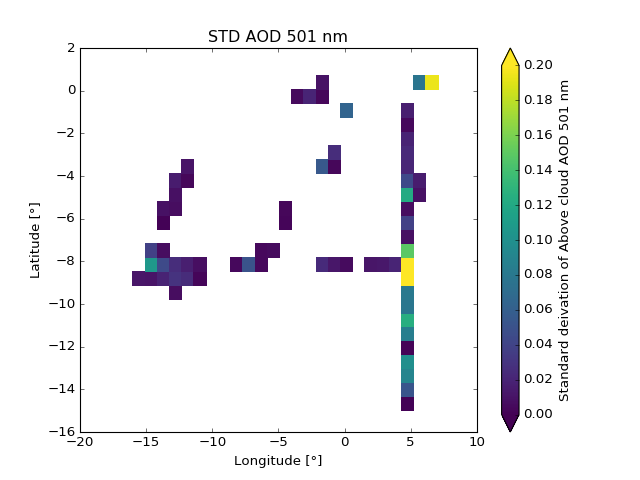

In [133]:
plt.figure()
p = plt.pcolor(ye,xe,astd,vmin=0.0,vmax=0.2,cmap='viridis')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('STD AOD 501 nm')

cb = plt.colorbar(p,extend='both')
cb.set_label('Standard deivation of Above cloud AOD 501 nm')
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_stdAOD_map.png',
            transparent=True,dpi=500)

In [130]:
med,xe,ye,bn = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],s['Longitude'][s['fl_acaod']],s['AOD0501'][s['fl_acaod']],
                           bins=26,range=[[-15,2],[-16,8]],statistic='median')
med = np.ma.masked_array(med,np.isnan(med))

<IPython.core.display.Javascript object>


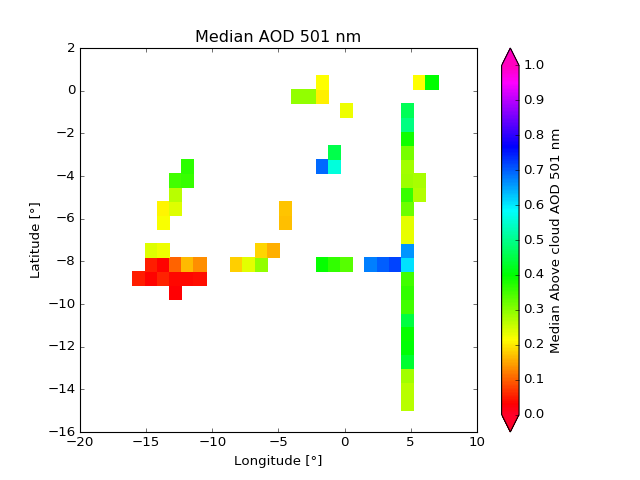

In [134]:
plt.figure()
p = plt.pcolor(ye,xe,med,vmin=0.0,vmax=1.0,cmap='gist_rainbow')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')

plt.title('Median AOD 501 nm')

cb = plt.colorbar(p,extend='both')
cb.set_label('Median Above cloud AOD 501 nm')
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_medianAOD_map.png',
            transparent=True,dpi=500)

### combine plots on one figure

<IPython.core.display.Javascript object>


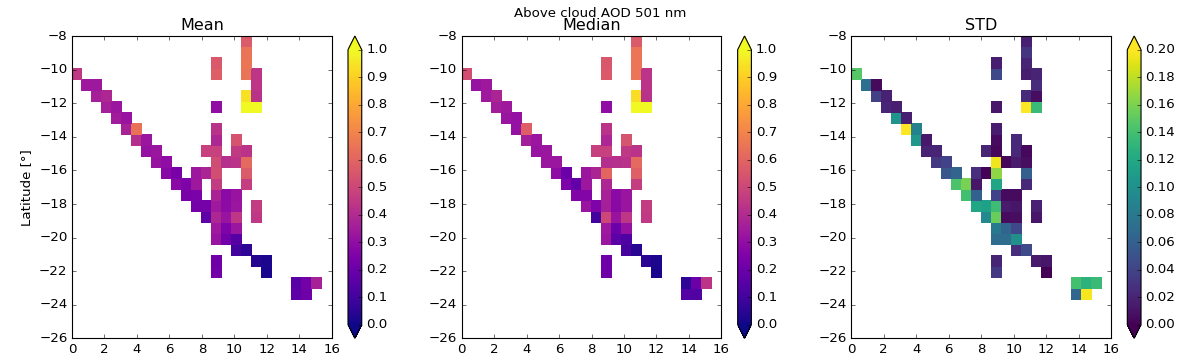

In [222]:
fig = plt.figure(figsize=(15,4.5))
ax1 = plt.subplot(1,3,1)

p = plt.pcolor(ye,xe,a,vmin=0.0,vmax=1.0,cmap='plasma')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('Mean')

cb = plt.colorbar(p,extend='both')
#cb.set_label('Mean Above cloud AOD 501 nm')


ax2 = plt.subplot(1,3,2)
p = plt.pcolor(ye,xe,med,vmin=0.0,vmax=1.0,cmap='plasma')

plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')

plt.title('Median')

cb = plt.colorbar(p,extend='both')
#cb.set_label('Median Above cloud AOD 501 nm')

ax3 = plt.subplot(1,3,3)
p = plt.pcolor(ye,xe,astd,vmin=0.0,vmax=0.2,cmap='viridis')

plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
plt.title('STD')

cb = plt.colorbar(p,extend='both')
#cb.set_label('Standard deivation of Above cloud AOD 501 nm')

#plt.tight_layout()
plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.06, right=0.98, top=0.9, bottom=0.06)
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_statsAOD_map.png',
            transparent=True,dpi=500)

In [135]:
cnt,xe,ye,bn = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],s['Longitude'][s['fl_acaod']],s['AOD0501'][s['fl_acaod']],
                           bins=26,range=[[-15,2],[-16,8]],statistic='count')
cnt = np.ma.masked_array(cnt,np.isnan(cnt))

In [138]:
uniq_cnt = lambda x: len(np.unique(x))

In [139]:
dcnt,xed,yed,bn = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],s['Longitude'][s['fl_acaod']],s['days'][s['fl_acaod']],
                           bins=26,range=[[-15,2],[-16,8]],statistic=uniq_cnt)
dcnt = np.ma.masked_array(dcnt,np.isnan(dcnt))

In [140]:
io = np.where((cnt.data>0.0) & (astd.data<1.0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [141]:
cnt.shape

(26, 26)

In [142]:
yy = [(y+ye[i+1])/2.0 for i,y in enumerate(ye[0:-1])]
yys = np.array(yy*26).reshape(26,-1)

In [143]:
xx = [(x+xe[i+1])/2.0 for i,x in enumerate(xe[0:-1])]
xxs = np.array(xx*26).reshape(26,-1)

In [144]:
cnt.data[io[0],io[1]].flatten()

array([   14.,   212.,    99.,   148.,     4.,   259.,   700.,   706.,
          24.,   741.,   160.,   139.,   349.,   423.,    79.,    69.,
        1607.,   399.,   141.,   126.,    24.,   276.,   123.,   381.,
          77.,    51.,    86.,   201.,   104.,   437.,   353.,   960.,
         127.,    86.,    17.,    18.,   538.,   397.,    10.,    43.,
          98.,    56.,   170.,   137.,   211.,   140.,   260.,   302.,
         145.,    49.,   726.,    97.,    81.,   312.,    35.,   366.,
          93.,   288.,   134.,    54.,   120.,    61.,    48.,    90.,
          46.,    41.,   359.,  1376.])

<IPython.core.display.Javascript object>


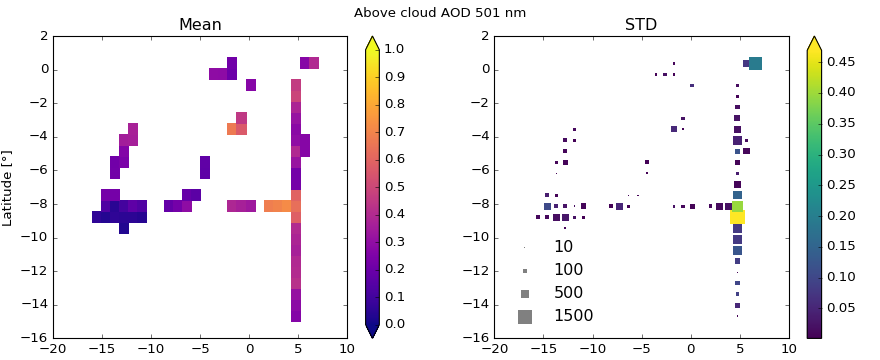

In [146]:
fig = plt.figure(figsize=(11,4.5))
ax1 = plt.subplot(1,2,1)

p = plt.pcolor(ye,xe,a,vmin=0.0,vmax=1.0,cmap='plasma')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('Mean')

cb = plt.colorbar(p,extend='both')


ax2 = plt.subplot(1,2,2)

p = plt.scatter(np.array(yy)[io[1]],np.array(xx)[io[0]],cnt.data[io[0],io[1]].flatten()/10,
                c=astd.data[io[0],io[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis')
plt.xlim(-20,10)
plt.ylim(-16,2)
plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
plt.title('STD')

cb = plt.colorbar(p,extend='max')
#cb.set_label('Standard deivation of Above cloud AOD 501 nm')

sizes = [10,100,500,1500]
labels = ['{0}'.format(z) for z in sizes]
points = [ax.scatter([], [], s=z/10, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    

#plt.tight_layout()
plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.06, right=0.98, top=0.9, bottom=0.06)
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_statsAOD_2panel_map.png',
            transparent=True,dpi=500)

Get the mean and std from the binned values, to try to remove the sampling issues

In [147]:
a.shape

(26, 26)

In [148]:
np.nanmean(a),np.nanmedian(a),np.nanmean(astd.data)

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:4130: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  part.partition(kth)


(0.30367648264447689, 0.28557726311990972, 0.043865542191980821)

<IPython.core.display.Javascript object>


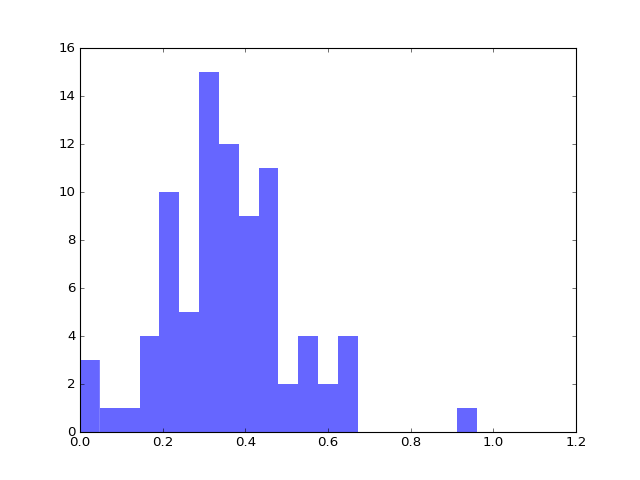

(array([  3.,   1.,   1.,   4.,  10.,   5.,  15.,  12.,   9.,  11.,   2.,
          4.,   2.,   4.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.]),
 array([ 0.   ,  0.048,  0.096,  0.144,  0.192,  0.24 ,  0.288,  0.336,
         0.384,  0.432,  0.48 ,  0.528,  0.576,  0.624,  0.672,  0.72 ,
         0.768,  0.816,  0.864,  0.912,  0.96 ,  1.008,  1.056,  1.104,
         1.152,  1.2  ]),
 <a list of 25 Patch objects>)

In [193]:
plt.figure()
plt.hist(a.flatten(),25,range=(0,1.2),edgecolor='None',alpha=0.6)

## Plot a map of the distribution of the Angstrom exponent

In [149]:
astat,astat2 = {},{}

In [150]:
astat['mean'],astat['x'],astat['y'],astat['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs'][s['fl_acaod'],ia],
                                                                          bins=26,range=[[-15,2],[-16,8]])
astat['mean'] = np.ma.masked_array(astat['mean'],np.isnan(astat['mean']))

KeyError: 'angs'

In [151]:
astat2['mean'],astat2['x'],astat2['y'],astat2['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs_470_865'][s['fl_acaod']],
                                                                          bins=26,range=[[-15,2],[-16,8]])
astat2['mean'] = np.ma.masked_array(astat2['mean'],np.isnan(astat2['mean']))

<IPython.core.display.Javascript object>


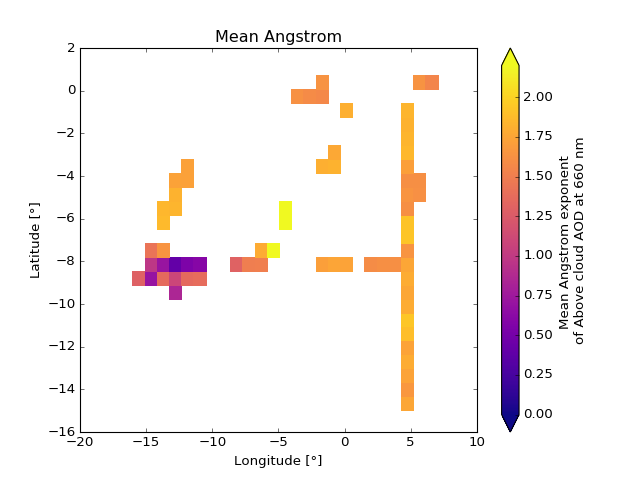

In [153]:
plt.figure()
p = plt.pcolor(astat2['y'],astat2['x'],astat2['mean'],vmin=0.0,vmax=2.2,cmap='plasma')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')

plt.title('Mean Angstrom')

cb = plt.colorbar(p,extend='both')
cb.set_label('Mean Angstrom exponent \nof Above cloud AOD')
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_meanAngstrom_map.png',
            transparent=True,dpi=500)

In [126]:
astat['median'],astat['xe'],astat['ye'],astat['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs'][s['fl_acaod'],ia],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic='median')
astat['median'] = np.ma.masked_array(astat['median'],np.isnan(astat['median']))

In [154]:
astat2['median'],astat2['xe'],astat2['ye'],astat2['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs_470_865'][s['fl_acaod']],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic='median')
astat2['median'] = np.ma.masked_array(astat2['median'],np.isnan(astat2['median']))

<IPython.core.display.Javascript object>


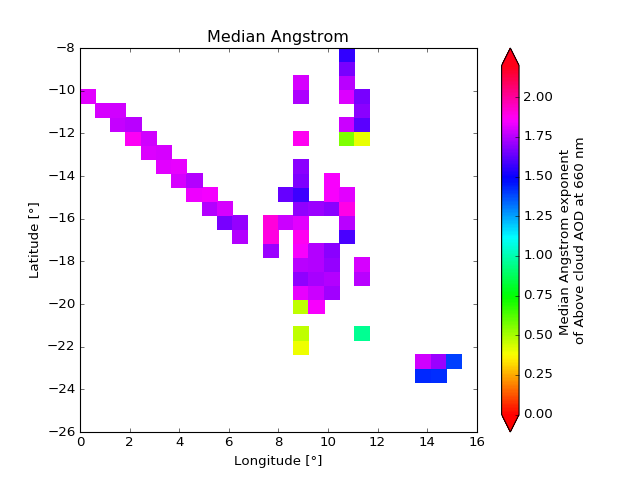

In [211]:
plt.figure()
p = plt.pcolor(astat['ye'],astat['xe'],astat['median'],vmin=0.0,vmax=2.2,cmap='hsv')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('Median Angstrom')
cb = plt.colorbar(p,extend='both')
cb.set_label('Median Angstrom exponent \nof Above cloud AOD at 660 nm')
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_medianAngstrom_map.png',
            transparent=True,dpi=500)

In [128]:
astat['std'],astat['xs'],astat['ys'],astat['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs'][s['fl_acaod'],ia],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic=np.std)
astat['std'] = np.ma.masked_array(astat['std'],np.isnan(astat['std']))

In [155]:
astat2['std'],astat2['xs'],astat2['ys'],astat2['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs_470_865'][s['fl_acaod']],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic=np.std)
astat2['std'] = np.ma.masked_array(astat2['std'],np.isnan(astat2['std']))

<IPython.core.display.Javascript object>


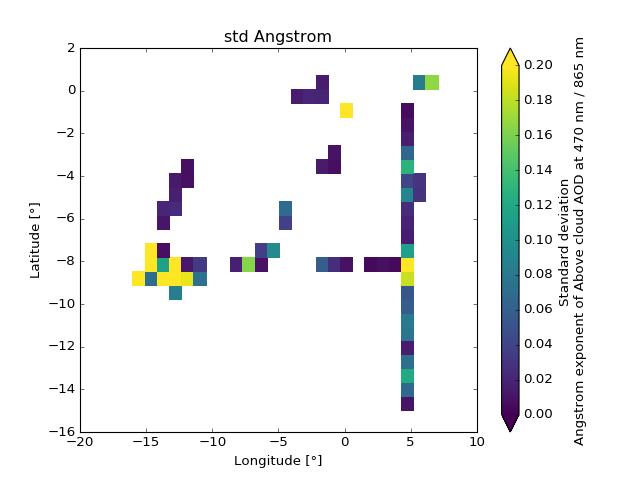

In [157]:
plt.figure()
p = plt.pcolor(astat2['ys'],astat2['xs'],astat2['std'],vmin=0.0,vmax=0.2,cmap='viridis')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('std Angstrom')

cb = plt.colorbar(p,extend='both')
cb.set_label('Standard deviation \nAngstrom exponent of Above cloud AOD at 470 nm / 865 nm')
plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_stdAngstrom_map.png',
            transparent=True,dpi=500)

### Combine stats of Angstrom into single figure

<IPython.core.display.Javascript object>


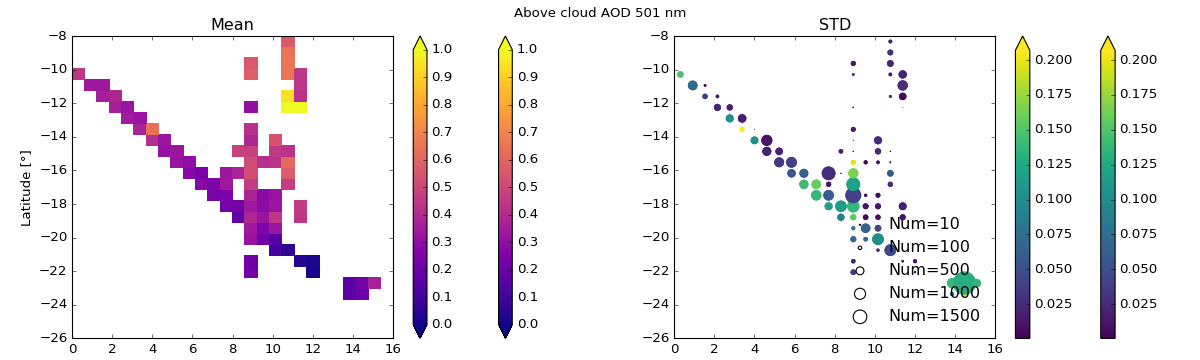

In [223]:
fig = plt.figure(figsize=(15,4.5))
ax1 = plt.subplot(1,3,1)

p = plt.pcolor(astat['y'],astat['x'],astat['mean'],vmin=0.0,vmax=2.2,cmap='gist_rainbow')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')

plt.title('Mean')

cb = plt.colorbar(p,extend='both')


ax2 = plt.subplot(1,3,2)
p = plt.pcolor(astat['ye'],astat['xe'],astat['median'],vmin=0.0,vmax=2.2,cmap='gist_rainbow')

plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
plt.title('Median')
cb = plt.colorbar(p,extend='both')

ax3 = plt.subplot(1,3,3)
p = plt.pcolor(astat['ys'],astat['xs'],astat['std'],vmin=0.0,vmax=0.2,cmap='viridis')

plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
plt.title('STD')

cb = plt.colorbar(p,extend='both')

plt.suptitle('Above cloud Angstrom exponent at 660 nm\n')
plt.subplots_adjust(left=0.06, right=0.98, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_statsAngstrom_map.png',
            transparent=True,dpi=500)

In [130]:
astat['cnt'],astat['xs'],astat['ys'],astat['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs'][s['fl_acaod'],ia],
                                                                          bins=26,range=[[-25,-8],[0,16]],
                                                                           statistic='count')
astat['cnt'] = np.ma.masked_array(astat['cnt'],np.isnan(astat['cnt']))

In [158]:
astat2['cnt'],astat2['xs'],astat2['ys'],astat2['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['angs_470_865'][s['fl_acaod']],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic='count')
astat2['cnt'] = np.ma.masked_array(astat2['cnt'],np.isnan(astat2['cnt']))

In [159]:
s['days']

array([  0.,   0.,   0., ...,  18.,  18.,  18.])

In [160]:
astat['dcnt'],astat['dxs'],astat['dys'],astat['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['days'][s['fl_acaod']],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic=uniq_cnt)
astat['dcnt'] = np.ma.masked_array(astat['dcnt'],np.isnan(astat['dcnt']))

In [161]:
astat2['dcnt'],astat2['xs'],astat2['ys'],astat2['bin'] = st.binned_statistic_2d(s['Latitude'][s['fl_acaod']],
                                                                          s['Longitude'][s['fl_acaod']],
                                                                          s['days'][s['fl_acaod']],
                                                                          bins=26,range=[[-15,2],[-16,8]],
                                                                           statistic=uniq_cnt)
astat2['dcnt'] = np.ma.masked_array(astat2['dcnt'],np.isnan(astat2['dcnt']))

In [167]:
#iao = np.where((astat['cnt'].data>0.0) & (astat['std'].data<1.0))
iao2 = np.where((astat2['cnt'].data>0.0) & (astat2['std'].data<1.0))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


<IPython.core.display.Javascript object>


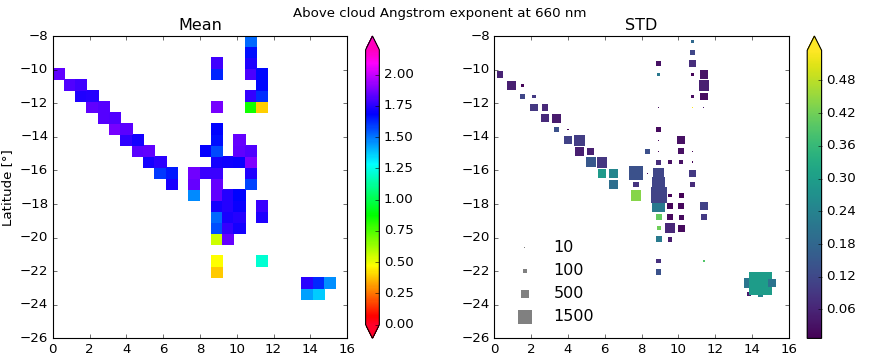

In [409]:
fig = plt.figure(figsize=(11,4.5))
ax1 = plt.subplot(1,2,1)

p = plt.pcolor(astat['y'],astat['x'],astat['mean'],vmin=0.0,vmax=2.2,cmap='gist_rainbow')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')

plt.title('Mean')

cb = plt.colorbar(p,extend='both')


ax2 = plt.subplot(1,2,2)

p = plt.scatter(np.array(yy)[iao[1]],np.array(xx)[iao[0]],astat['cnt'].data[iao[0],iao[1]].flatten()/10,
                c=astat['std'].data[iao[0],iao[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis')
plt.xlim(0,16)
plt.ylim(-26,-8)
plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
plt.title('STD')

cb = plt.colorbar(p,extend='max')
#cb.set_label('Standard deivation of Above cloud AOD 501 nm')

sizes = [10,100,500,1500]
labels = ['{0}'.format(z) for z in sizes]
points = [ax.scatter([], [], s=z/10, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    

plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.06, right=0.98, top=0.9, bottom=0.06)


plt.suptitle('Above cloud Angstrom exponent at 660 nm\n')
plt.subplots_adjust(left=0.06, right=0.98, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_statsAngstrom_2panel_map.png',
            transparent=True,dpi=500)

### Add the coastline to the figures

In [185]:
np.linspace(-17,11,8)

array([-17., -13.,  -9.,  -5.,  -1.,   3.,   7.,  11.])

In [186]:
def mapfig(ax=plt.gca()):
    m = Basemap(projection='merc',llcrnrlat=-18,urcrnrlat=4,llcrnrlon=-17,urcrnrlon=11,resolution='l',ax=ax)
    m.drawcoastlines()
    m.drawmeridians(np.linspace(-17,11,8),labels=[0,0,0,1],linewidth=0.1)
    m.drawparallels(np.linspace(-18,4,12),labels=[1,0,0,0],linewidth=0.1)
    m.shadedrelief(alpha=0.4)
    return m

In [164]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()
ax1 = ax[0]
#ax1 = plt.subplot(1,2,1)
m = mapfig(ax=ax1)

mx,my = m(astat['y'],astat['x'])
p = ax1.pcolor(mx,my,astat['mean'],vmin=0.0,vmax=2.2,cmap='gist_rainbow')
ax1.set_title('Mean')
cb = m.colorbar(p,extend='both')

ax2 = ax[1]
#ax2 = plt.subplot(1,2,2)
m2 = mapfig(ax=ax2)
mxx,myy = m2(np.array(yy),np.array(xx))
p2 = ax2.scatter(mxx[iao[1]],myy[iao[0]],astat['cnt'].data[iao[0],iao[1]].flatten()/5,
                c=astat['std'].data[iao[0],iao[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis')
#plt.xlim(0,16)
#plt.ylim(-26,-8)
#plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')
#cb.set_label('Standard deivation of Above cloud AOD 501 nm')

sizes = [10,100,500,1500]
labels = ['{0}'.format(z) for z in sizes]
points = [ax2.scatter([], [], s=z/5, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    
plt.suptitle('Above cloud Angstrom exponent at 660 nm\n')
plt.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_statsAngstrom_2panel_actualmap.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>

KeyError: 'y'

In [165]:
astat2['yy'] = np.array([(y+astat2['ys'][i+1])/2.0 for i,y in enumerate(astat2['ys'][0:-1])])
astat2['xx'] = np.array([(x+astat2['xs'][i+1])/2.0 for i,x in enumerate(astat2['xs'][0:-1])])

<IPython.core.display.Javascript object>


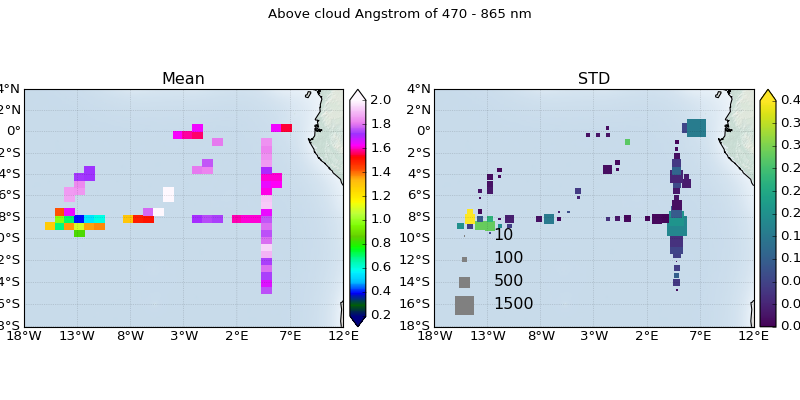

In [182]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()
ax1 = ax[0]
#ax1 = plt.subplot(1,2,1)
m = mapfig(ax=ax1)

mx,my = m(astat2['y'],astat2['x'])
p = ax1.pcolor(mx,my,astat2['mean'],vmin=0.2,vmax=2.0,cmap='gist_ncar')
ax1.set_title('Mean')
cb = m.colorbar(p,extend='both')

ax2 = ax[1]
#ax2 = plt.subplot(1,2,2)
m2 = mapfig(ax=ax2)
mxx,myy = m2(astat2['yy'],astat2['xx'])
p2 = ax2.scatter(mxx[iao2[1]],myy[iao2[0]],astat2['cnt'].data[iao2[0],iao2[1]].flatten()/5,
                c=astat2['std'].data[iao2[0],iao2[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis',vmin=0.0,vmax=0.4)
#plt.xlim(0,16)
#plt.ylim(-26,-8)
#plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')
#cb.set_label('Standard deivation of Above cloud AOD 501 nm')

sizes = [10,100,500,1500]
labels = ['{0}'.format(z) for z in sizes]
points = [ax2.scatter([], [], s=z/5, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    
plt.suptitle('Above cloud Angstrom of 470 - 865 nm\n')
plt.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_statsAngstrom_470_865_2panel_actualmap.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


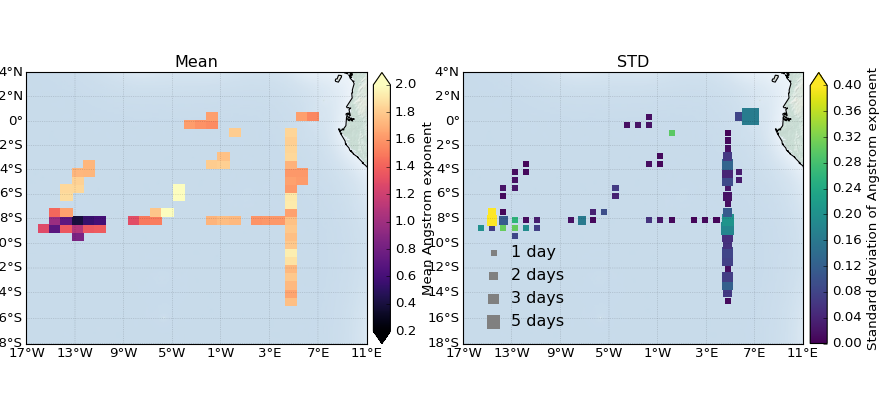

In [189]:
fig,ax = plt.subplots(1,2,figsize=(11,5))
ax = ax.flatten()
ax1 = ax[0]
#ax1 = plt.subplot(1,2,1)
m = mapfig(ax=ax1)

mx,my = m(astat2['y'],astat2['x'])
p = ax1.pcolor(mx,my,astat2['mean'],vmin=0.2,vmax=2.0,cmap='magma')
ax1.set_title('Mean')
cb = m.colorbar(p,extend='both')
cb.set_label('Mean Angstrom exponent')

ax2 = ax[1]
#ax2 = plt.subplot(1,2,2)
m2 = mapfig(ax=ax2)
mxx,myy = m2(astat2['yy'],astat2['xx'])
p2 = ax2.scatter(mxx[iao2[1]],myy[iao2[0]],astat2['dcnt'].data[iao2[0],iao2[1]].flatten()*30,
                c=astat2['std'].data[iao2[0],iao2[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis',vmin=0.0,vmax=0.4)
#plt.xlim(0,16)
#plt.ylim(-26,-8)
#plt.xlabel(u'Longitude [°]')
#plt.ylabel(u'Latitude [°]')
ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')
cb.set_label('Standard deviation of Angstrom exponent')
#cb.set_label('Standard deivation of Above cloud AOD 501 nm')

sizes = [1,2,3,5] #[10,100,500,1500]
labels = ['{0} day{1}'.format(z,'s' if z>1 else '') for z in sizes]
points = [ax2.scatter([], [], s=z*30, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left',handletextpad=0.1)
    
#plt.suptitle('Above cloud Angstrom of 470 nm / 865 nm\n')
plt.subplots_adjust(left=0.03, right=0.94, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_statsAngstrom_470_865_2panel_actualmap_days.png',
            transparent=True,dpi=500)

In [191]:
astat2['mean'].mean(),astat2['median'].mean(),astat2['std'].mean()

(1.6006373373332075, 1.5959852941176469, 0.078927536263825454)

<IPython.core.display.Javascript object>


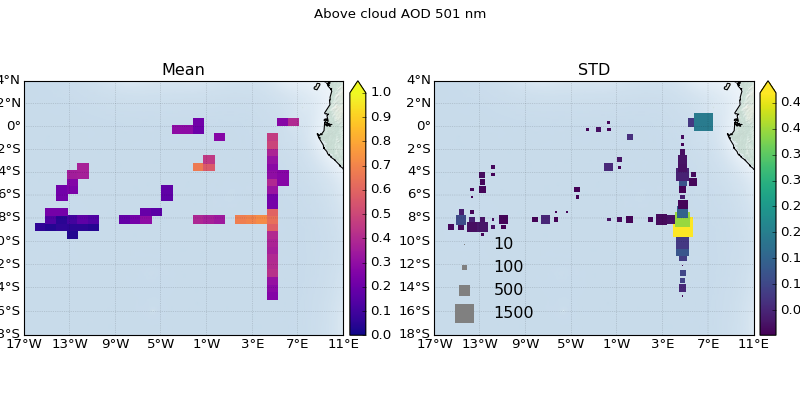

In [190]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()
ax1 = ax[0]
m = mapfig(ax=ax1)

mxe,mye = m(ye,xe)
p = ax1.pcolor(mxe,mye,a,vmin=0.0,vmax=1.0,cmap='plasma')
ax1.set_title('Mean')
cb = m.colorbar(p,extend='max')

ax2 = ax[1]
m2 = mapfig(ax=ax2)
mxxe,myye = m2(np.array(yy)[io[1]],np.array(xx)[io[0]])
p2 = ax2.scatter(mxxe,myye,cnt.data[io[0],io[1]].flatten()/5.0,
                c=astd.data[io[0],io[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis')
ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')

sizes = [10,100,500,1500]
labels = ['{0}'.format(z) for z in sizes]
points = [ax2.scatter([], [], s=z/5.0, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    
plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_statsAOD_2panel_actualmap.png',
            transparent=True,dpi=500)

Now calculate the averages and std, from the binned statistics

<IPython.core.display.Javascript object>


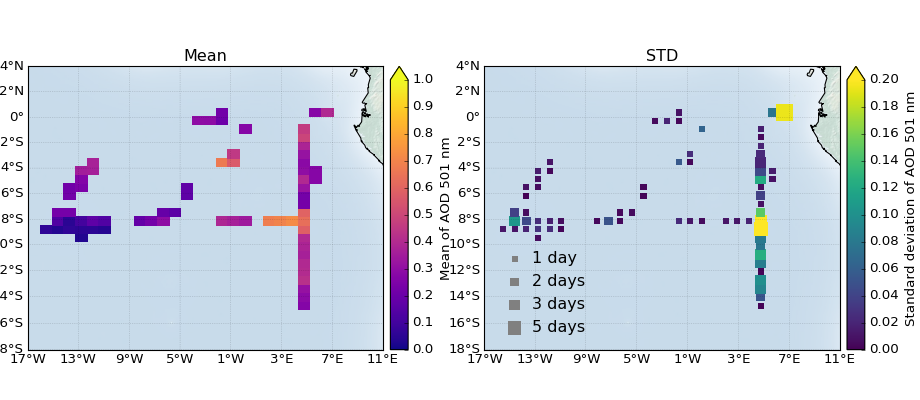

In [194]:
fig,ax = plt.subplots(1,2,figsize=(11.5,5))
ax = ax.flatten()
ax1 = ax[0]
m = mapfig(ax=ax1)
mxe,mye = m(ye,xe)
p = ax1.pcolor(mxe,mye,a,vmin=0.0,vmax=1.0,cmap='plasma')

#mxxa,myya = m(np.array(anet_lon),np.array(anet_lat))
#pa = ax1.scatter(mxxa,myya,150,c=np.array(anet_mean_fineaod),
#               marker='^',edgecolor='k',linewidth=0.5,cmap='plasma',vmin=0.0,vmax=1.0)

ax1.set_title('Mean')
cb = m.colorbar(p,extend='max')
cb.set_label('Mean of AOD 501 nm')


ax2 = ax[1]
m2 = mapfig(ax=ax2)
mxxe,myye = m2(np.array(yy)[io[1]],np.array(xx)[io[0]])
p2 = ax2.scatter(mxxe,myye,dcnt.data[io[0],io[1]].flatten()*30.0,
                c=astd.data[io[0],io[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis',vmin=0.0,vmax=0.2)
#m2xxa,m2yya = m2(np.array(anet_lon),np.array(anet_lat))
#pa2 = ax2.scatter(m2xxa,m2yya,150,c=np.array(anet_std_fineaod),
#               marker='^',edgecolor='k',linewidth=0.5,cmap='viridis',vmin=0.0,vmax=p2.get_clim()[1])

ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')
cb.set_label('Standard deviation of AOD 501 nm')

sizes = [1,2,3,5]#[10,100,500,1500]
labels = ['{0} day{1}'.format(z,'s' if z>1 else '') for z in sizes]
points = [ax2.scatter([], [], s=z*30.0, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left',handletextpad=0.1)
    
#plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.03, right=0.94, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_statsAOD_2panel_actualmap_days.png',
            transparent=True,dpi=500)

# Load the AERONET sites, and put them on the map

## get online AERONET data and save

In [74]:
import aeronet

In [75]:
anet = aeronet.get_aeronet(daystr='2016-08-01',daystr2='2016-09-30',lat_range=[-8.0,-26.0],lon_range=[0,16.0],
                           avg=False,lev='SDA20',version='3')

Getting file from internet: at aeronet.gsfc.nasa.gov
http://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v3?year=2016&month=08&day=01&year2=2016&month2=09&day2=30&SDA20=1&AVG=10&lat1=-26.000000&lat2=-8.000000&lon1=0.000000&lon2=16.000000



The following data are automatically cloud cleared and quality assured with pre-field and post-field calibration applied.

Contact: PI=Stuart_Piketh_and_Paola_Formenti; PI Email=stuart.piketh@nwu.ac.za_and_paola.formenti@lisa.u-pec.fr


In [77]:
sio.savemat(fp+'/data/aeronet_20160801.mat',anet)

TypeError: expected a single-segment buffer object

## Alternatively load the AERONET from file

In [78]:
kanet = anet.keys()
kanet.sort()
kanet

['2nd_Order_Reg_Fit_ErrorTotal_AOD_500nmregression_dtau_a',
 '380nm_Input_AOD',
 '400nm_Input_AOD',
 '412nm_Input_AOD',
 '440nm_Input_AOD',
 '443nm_Input_AOD',
 '490nm_Input_AOD',
 '500nm_Input_AOD',
 '510nm_Input_AOD',
 '531nm_Input_AOD',
 '532nm_Input_AOD',
 '551nm_Input_AOD',
 '555nm_Input_AOD',
 '560nm_Input_AOD',
 '620nm_Input_AOD',
 '667nm_Input_AOD',
 '675nm_Input_AOD',
 '681nm_Input_AOD',
 '709nm_Input_AOD',
 '779nm_Input_AOD',
 '865nm_Input_AOD',
 '870nm_Input_AOD',
 'AEFine_Mode_500nmalpha_f',
 'AERONET_Instrument_Number',
 'AERONET_Site',
 'AERONET_Site_Name',
 'AOD_Empty',
 'AOD_Empty_1',
 'AOD_Empty_2',
 'AOD_Empty_3',
 'AOD_Empty_4',
 'Air_Mass',
 'Angstrom_ExponentAETotal_500nmalpha',
 'Coarse_Mode_AOD_500nmtau_c',
 'Data_Quality_Level',
 'Date_ddmmyyyy',
 'Day_of_Year',
 'Day_of_Yearfraction',
 'Exact_Wavelengths_for_Input_AODum',
 'FineModeFraction_500nmeta',
 'Fine_Mode_AOD_500nmtau_f',
 'Last_Processing_Date',
 'Number_of_Wavelengths',
 'RMSE_Coarse_Mode_AOD_500nmDta

In [79]:
anet_bad = np.where(anet == -999.0)

In [80]:
aod_aeronet = {}
anet_lat,anet_lon,anet_mean_fineaod,anet_mean_coarseaod,anet_mean_totaod,anet_name = [],[],[],[],[],[]
anet_std_fineaod,anet_cnt_fineaod = [],[]
for aa in np.unique(anet['AERONET_Site_Name']):
    f_anet = anet['AERONET_Site_Name']==aa
    aod_aeronet[aa] = {'aod_fine':anet['Fine_Mode_AOD_500nmtau_f'][f_anet],
                   'aod_coarse':anet['Coarse_Mode_AOD_500nmtau_c'][f_anet],
                   'aod_tot':anet['Total_AOD_500nmtau_a'][f_anet],
                   'doy':anet['Day_of_Yearfraction'][f_anet],
                   'lat':anet['Site_LatitudeDegrees'][f_anet][0],
                   'lon':anet['Site_LongitudeDegrees'][f_anet][0]}
    anet_name.append(aa)
    anet_lon.append(anet['Site_LongitudeDegrees'][f_anet][0])
    anet_lat.append(anet['Site_LatitudeDegrees'][f_anet][0])

for aa in anet_name:
    aod_aeronet[aa]['mean_aod_fine'] = np.nanmean(aod_aeronet[aa]['aod_fine'][aod_aeronet[aa]['aod_fine']!=-999.0])
    aod_aeronet[aa]['median_aod_fine'] = np.nanmedian(aod_aeronet[aa]['aod_fine'][aod_aeronet[aa]['aod_fine']!=-999.0])
    aod_aeronet[aa]['std_aod_fine'] = np.nanstd(aod_aeronet[aa]['aod_fine'][aod_aeronet[aa]['aod_fine']!=-999.0])
    aod_aeronet[aa]['mean_aod_coarse'] = np.nanmean(aod_aeronet[aa]['aod_coarse'][aod_aeronet[aa]['aod_coarse']!=-999.0])
    aod_aeronet[aa]['median_aod_coarse'] = np.nanmedian(aod_aeronet[aa]['aod_coarse'][aod_aeronet[aa]['aod_coarse']!=-999.0])
    aod_aeronet[aa]['std_aod_coarse'] = np.nanstd(aod_aeronet[aa]['aod_coarse'][aod_aeronet[aa]['aod_coarse']!=-999.0])
    aod_aeronet[aa]['mean_aod_tot'] = np.nanmean(aod_aeronet[aa]['aod_tot'][aod_aeronet[aa]['aod_tot']!=-999.0])
    aod_aeronet[aa]['median_aod_tot'] = np.nanmedian(aod_aeronet[aa]['aod_tot'][aod_aeronet[aa]['aod_tot']!=-999.0])
    aod_aeronet[aa]['std_aod_tot'] = np.nanstd(aod_aeronet[aa]['aod_tot'][aod_aeronet[aa]['aod_tot']!=-999.0])

    anet_mean_fineaod.append(aod_aeronet[aa]['mean_aod_fine'])
    anet_mean_coarseaod.append(aod_aeronet[aa]['mean_aod_coarse'])
    anet_mean_totaod.append(aod_aeronet[aa]['mean_aod_tot'])
    
    anet_std_fineaod.append(aod_aeronet[aa]['std_aod_fine'])
    anet_cnt_fineaod.append(len(aod_aeronet[aa]['aod_fine'][aod_aeronet[aa]['aod_fine']!=-999.0]))
    
    

In [173]:
anet_name

['DRAGON_Henties_1',
 'DRAGON_Henties_2',
 'DRAGON_Henties_3',
 'DRAGON_Henties_4',
 'DRAGON_Henties_5',
 'DRAGON_Henties_6',
 'Gobabeb',
 'Henties_Bay',
 'Lubango',
 'Namibe',
 'Walvis_Bay_airport']

In [199]:
anet_lon

[14.295125000000001,
 14.339791,
 14.377948,
 14.345504,
 14.399573,
 14.430668000000001,
 15.041058,
 14.259740000000001,
 13.445,
 12.178000000000001,
 14.640000000000001]

In [98]:
anet_lat

[-22.052274000000001,
 -22.115908000000001,
 -22.184011999999999,
 -22.020377,
 -22.091750999999999,
 -22.166736,
 -23.561619,
 -22.09506,
 -14.958,
 -15.159000000000001,
 -22.98]

## Now plot AERONET values on the map of ACAOD 501

<IPython.core.display.Javascript object>


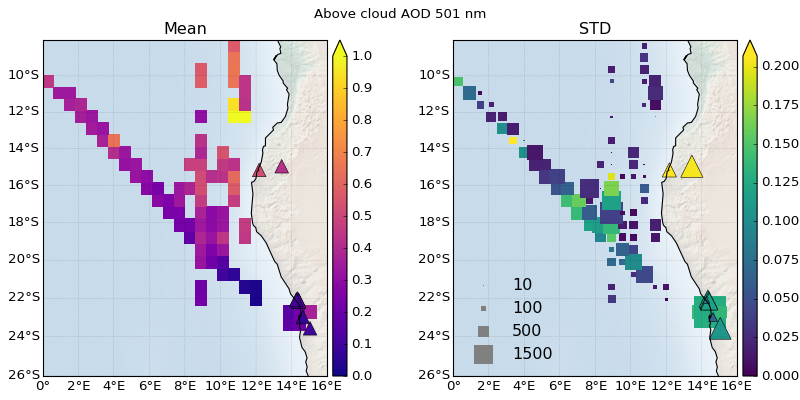

In [142]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()
ax1 = ax[0]
m = mapfig(ax=ax1)
mxe,mye = m(ye,xe)
p = ax1.pcolor(mxe,mye,a,vmin=0.0,vmax=1.0,cmap='plasma')

mxxa,myya = m(np.array(anet_lon),np.array(anet_lat))
pa = ax1.scatter(mxxa,myya,150,c=np.array(anet_mean_fineaod),
               marker='^',edgecolor='k',linewidth=0.5,cmap='plasma',vmin=0.0,vmax=1.0)

ax1.set_title('Mean')
cb = m.colorbar(p,extend='max')


ax2 = ax[1]
m2 = mapfig(ax=ax2)
mxxe,myye = m2(np.array(yy)[io[1]],np.array(xx)[io[0]])
p2 = ax2.scatter(mxxe,myye,cnt.data[io[0],io[1]].flatten()/5.0,
                c=astd.data[io[0],io[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis',vmin=0.0)
m2xxa,m2yya = m2(np.array(anet_lon),np.array(anet_lat))
pa2 = ax2.scatter(m2xxa,m2yya,np.array(anet_cnt_fineaod)/10.0,c=np.array(anet_std_fineaod),
               marker='^',edgecolor='k',linewidth=0.5,cmap='viridis',vmin=0.0,vmax=p2.get_clim()[1])

ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')

sizes = [10,100,500,1500]
labels = ['{0}'.format(z) for z in sizes]
points = [ax2.scatter([], [], s=z/5.0, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    
plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.03, right=0.97, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_statsAOD_2panel_actualmap_withAERONET.png',
            transparent=True,dpi=500)

In [494]:
p2.get_clim()

(0.00045564509955381416, 0.2069412015976661)

## number of days map plot with AERONET

<IPython.core.display.Javascript object>


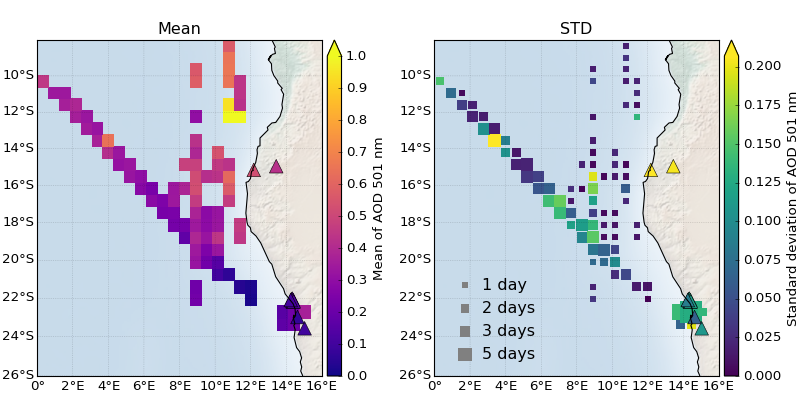

In [169]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()
ax1 = ax[0]
m = mapfig(ax=ax1)
mxe,mye = m(ye,xe)
p = ax1.pcolor(mxe,mye,a,vmin=0.0,vmax=1.0,cmap='plasma')

mxxa,myya = m(np.array(anet_lon),np.array(anet_lat))
pa = ax1.scatter(mxxa,myya,150,c=np.array(anet_mean_fineaod),
               marker='^',edgecolor='k',linewidth=0.5,cmap='plasma',vmin=0.0,vmax=1.0)

ax1.set_title('Mean')
cb = m.colorbar(p,extend='max')
cb.set_label('Mean of AOD 501 nm')


ax2 = ax[1]
m2 = mapfig(ax=ax2)
mxxe,myye = m2(np.array(yy)[io[1]],np.array(xx)[io[0]])
p2 = ax2.scatter(mxxe,myye,dcnt.data[io[0],io[1]].flatten()*30.0,
                c=astd.data[io[0],io[1]].flatten(),
               marker='s',edgecolor='None',cmap='viridis',vmin=0.0)
m2xxa,m2yya = m2(np.array(anet_lon),np.array(anet_lat))
pa2 = ax2.scatter(m2xxa,m2yya,150,c=np.array(anet_std_fineaod),
               marker='^',edgecolor='k',linewidth=0.5,cmap='viridis',vmin=0.0,vmax=p2.get_clim()[1])

ax2.set_title('STD')
cb = m2.colorbar(p2,extend='max')
cb.set_label('Standard deviation of AOD 501 nm')

sizes = [1,2,3,5]#[10,100,500,1500]
labels = ['{0} day{1}'.format(z,'s' if z>1 else '') for z in sizes]
points = [ax2.scatter([], [], s=z*30.0, c='grey',marker='s',edgecolor='None') for z in sizes]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left',handletextpad=0.1)
    
#plt.suptitle('Above cloud AOD 501 nm\n')
plt.subplots_adjust(left=0.03, right=0.94, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_statsAOD_2panel_actualmap_withAERONET_days.png',
            transparent=True,dpi=500)

## Get the AERONET AOD on the routine flight comparison plot

In [81]:
from datetime import datetime

In [82]:
aod_aeronet['DRAGON_Henties_6']

{'aod_coarse': array([ 0.015868,  0.012379,  0.014465, ...,  0.047462,  0.045297,
         0.049837]),
 'aod_fine': array([ 0.089251,  0.077998,  0.073749, ...,  0.039854,  0.039059,  0.03936 ]),
 'aod_tot': array([ 0.105118,  0.090377,  0.088214, ...,  0.087316,  0.084355,
         0.089197]),
 'doy': array([ 234.612512,  234.619977,  234.621354, ...,  272.366586,
         272.368669,  272.370752]),
 'lat': -22.166736,
 'lon': 14.430668000000001,
 'mean_aod_coarse': 0.046902493141048197,
 'mean_aod_fine': 0.14007472986282093,
 'mean_aod_tot': 0.18697720963770667,
 'median_aod_coarse': 0.040046999999999999,
 'median_aod_fine': 0.120603,
 'median_aod_tot': 0.18119299999999999,
 'std_aod_coarse': 0.033204767155914743,
 'std_aod_fine': 0.10646803850569227,
 'std_aod_tot': 0.11577818271636255}

In [83]:
doy_rtn = [datetime.strptime(dnt,'%Y%m%d').timetuple().tm_yday for dnt in d_rtn]
doy_rtn
iaero_rtn = [(aod_aeronet['DRAGON_Henties_6']['doy']>=doyr*1.0-0.33) & (aod_aeronet['DRAGON_Henties_6']['doy']<=doyr*1.0+1.0) for doyr in doy_rtn]

In [84]:
iadr = iaero_rtn[0]
aero_mean = []
aero_median = []
aod_aeronet['DRAGON_Henties_6']['aod_fine'][aod_aeronet['DRAGON_Henties_6']['aod_fine']<-998.0] = np.nan
for iai,iaer in enumerate(iaero_rtn):
    iadr  = iadr | iaer
    aero_mean.append(np.nanmean(aod_aeronet['DRAGON_Henties_6']['aod_fine'][iaer]))
    aero_median.append(np.nanmedian(aod_aeronet['DRAGON_Henties_6']['aod_fine'][iaer]))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/usr/local/lib/python2.7/dist-packages/numpy/lib/nanfunctions.py:990: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [85]:
datetime(2016,9,1).timetuple().tm_yday

245

In [86]:
iaero_aug = aod_aeronet['DRAGON_Henties_6']['doy']<245.0
iaero_sep = aod_aeronet['DRAGON_Henties_6']['doy']>=245.0

In [87]:
aero_mean

[nan,
 0.100578875,
 0.2989578793103449,
 0.27575576785714284,
 0.18388717021276596,
 0.5177195]

<IPython.core.display.Javascript object>


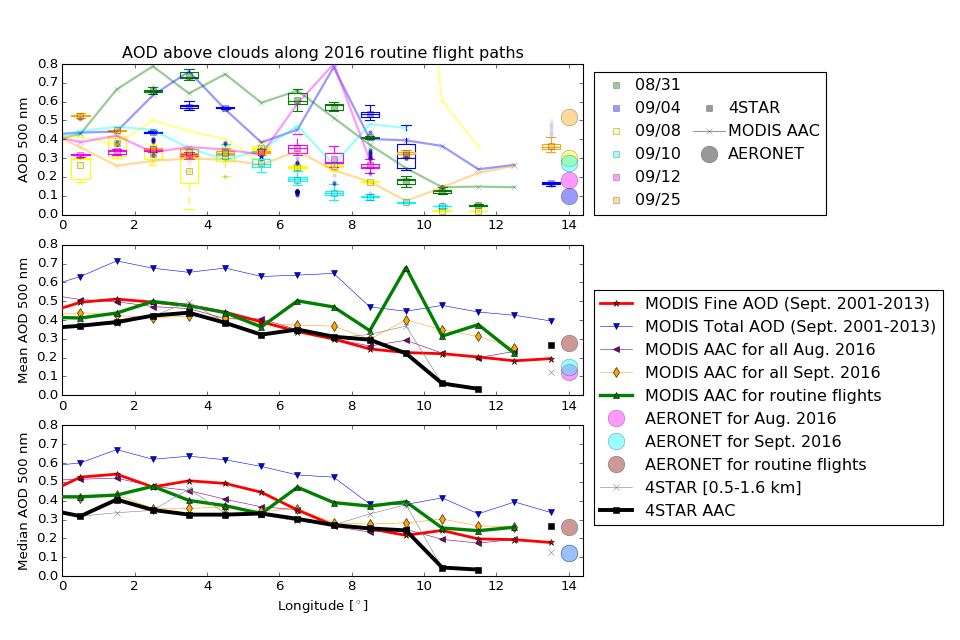

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:76: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: Mean of empty slice
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:88: RuntimeWarning: Mean of empty slice


In [89]:
plt.figure(figsize=(12,8))

ax = plt.subplot(3,1,1)
plt.ylabel('AOD 500 nm')
plt.ylim(0,0.8)

plt.title('AOD above clouds along 2016 routine flight paths')

means = []
medians = []
for j,f in enumerate(flra):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    bo = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)
    color_box(bo,cls[j])
    [plt.setp(bo['fliers'][idx],alpha=0.05)for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['fliers'][idx],color=cls[j])for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['fliers'][idx],marker='.')for idx in xrange(len(bo['fliers']))]
    [plt.setp(bo['means'][idx],alpha=0.05)for idx in xrange(len(bo['means']))]
    means.append([a.get_ydata()[0] for a in bo['means']])
    medians.append([a.get_ydata()[0] for a in bo['medians']])
    plt.plot(pos3,[a.get_ydata()[0] for a in bo['means']],
             's',zorder=100,color=cls[j],label='{}/{}'.format(d_rtn[j][4:6],d_rtn[j][6:8],vv=vv),
             lw=2.5,alpha=0.4)   
    
meansr = []
mediansr = []
for j,f in enumerate(flr):
    binsf = []
    for i,c in enumerate(lims3[0:-1]):
        lon_fl = (s['Longitude'][f]>=c)&(s['Longitude'][f]<lims3[i+1])
        binsf.append(s['AOD0501'][f][lon_fl])
    bn = plt.boxplot(binsf,0,'.',showmeans=True,positions=pos3)

    meansr.append([a.get_ydata()[0] for a in bn['means']])
    mediansr.append([a.get_ydata()[0] for a in bn['medians']])
    [plt.setp(bn['fliers'][idx],alpha=0.0)for idx in xrange(len(bn['fliers']))]
    [plt.setp(bn['means'][idx],alpha=0.0)for idx in xrange(len(bn['means']))]
    [plt.setp(bn['boxes'][idx],alpha=0.0)for idx in xrange(len(bn['boxes']))]
    [plt.setp(bn['medians'][idx],alpha=0.0)for idx in xrange(len(bn['medians']))]
    [plt.setp(bn['whiskers'][idx],alpha=0.0)for idx in xrange(len(bn['whiskers']))]
    [plt.setp(bn['caps'][idx],alpha=0.0)for idx in xrange(len(bn['caps']))]

ac = []
for i,a in enumerate([daac[j] for j in i_flt]):
    plt.plot(a['BinCenter'][0,:],a['meanAODperbin'][1:,0],'x-',lw=2,color=cls[i],alpha=0.4)
             #label='{}/{} MODIS AAC'.format(d_rtn[i][4:6],d_rtn[i][6:8]))
    ac.append(a['meanAODperbin'][1:,0])
    
for i,aerm in enumerate(aero_mean):
    plt.plot(14.0,aerm,'o',color=cls[i],alpha=0.4,lw=2,markersize=15)

plt.plot([],[],'ko',alpha=0,label=' ')
plt.plot([],[],'ks',alpha=0.4,label='4STAR')
plt.plot([],[],'kx-',alpha=0.4,label='MODIS AAC')
plt.plot([],[],'ko',alpha=0.4,label='AERONET',markersize=15)
plt.plot([],[],'ko',alpha=0,label=' ')
plt.legend(numpoints=1,frameon=True, ncol=2, bbox_to_anchor=(1.005,1.0),loc=2,handletextpad=0.2,columnspacing=0.7)


ax2 = plt.subplot(3,1,2,sharex=ax)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AODFM_CLIMOMEAN'].data[0,:],
         '*-',color='r',label='MODIS Fine AOD (Sept. 2001-2013)',zorder=50,lw=2.5)
plt.plot(m.variables['LONGITUDE'].data[0,:],m.variables['AOD_CLIMOMEAN'].data[0,:],
         'v-',color='b',label='MODIS Total AOD (Sept. 2001-2013)',zorder=51,lw=0.5)

ac_aug = []
for i,a in enumerate([daac[j] for j in i_aug]):
    ac_aug.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_aug,axis=0),'<-',lw=0.5,color='purple',label='MODIS AAC for all Aug. 2016')
ac_sep = []
for i,a in enumerate([daac[j] for j in i_sep]):
    ac_sep.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmean(ac_sep,axis=0),'d-',lw=0.5,color='orange',label='MODIS AAC for all Sept. 2016')


plt.plot(a['BinCenter'][0,:],np.nanmean(ac,axis=0),'^-',lw=3,color='green',zorder=60,label='MODIS AAC for routine flights')

plt.plot(14.0,np.nanmean(aod_aeronet['DRAGON_Henties_6']['aod_fine'][iaero_aug]),'o',color='fuchsia',markersize=15,alpha=0.4,
         label='AERONET for Aug. 2016')
plt.plot(14.0,np.nanmean(aod_aeronet['DRAGON_Henties_6']['aod_fine'][iaero_sep]),'o',color='aqua',markersize=15,alpha=0.4,
         label='AERONET for Sept. 2016')
plt.plot(14.0,np.nanmean(aero_mean),'o',markersize=15,color='maroon',label='AERONET for routine flights',alpha=0.4)

plt.plot(pos3,np.nanmean(np.array(meansr),axis=0),'x-',color='grey',lw=0.5,zorder=180,label='4STAR [0.5-1.6 km]')
plt.plot(pos3,np.nanmean(np.array(means),axis=0),'s-k',lw=3.5,zorder=200,label='4STAR AAC')
plt.ylabel('Mean AOD 500 nm')


ax3 = plt.subplot(3,1,3,sharex=ax)
plt.plot(m2.variables['LONGITUDE'].data[0,:],np.median(m2.variables['AODFM_YRMEAN'].data[0,:,:],axis=1),
         '*-',color='r',zorder=50,lw=2.5,label='MODIS Fine AOD (Sept. 2001-2013)')
plt.plot(m2.variables['LONGITUDE'].data[0,:],np.median(m2.variables['AOD_YRMEAN'].data[0,:,:],axis=1),
         'v-',color='b',zorder=51,lw=0.5,label='MODIS Total AOD (Sept. 2001-2013)')

plt.ylim(0,0.8)

ac_aug = []
for i,a in enumerate([daac[j] for j in i_aug]):
    ac_aug.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmedian(ac_aug,axis=0),'<-',lw=0.5,color='purple',label='MODIS AAC for all Aug. 2016')
ac_sep = []
for i,a in enumerate([daac[j] for j in i_sep]):
    ac_sep.append(a['meanAODperbin'][1:,0])
plt.plot(a['BinCenter'][0,:],np.nanmedian(ac_sep,axis=0),'d-',lw=0.5,color='orange',label='MODIS AAC for all Sept. 2016')
plt.plot(a['BinCenter'][0,:],np.nanmedian(ac,axis=0),'^-',lw=3,color='green',zorder=60,label='MODIS AAC for routine flights')

plt.plot(14.0,np.nanmedian(aod_aeronet['DRAGON_Henties_6']['aod_fine'][iaero_aug]),'o',color='fuchsia',markersize=15,alpha=0.4,
         label='AERONET for Aug. 2016')
plt.plot(14.0,np.nanmedian(aod_aeronet['DRAGON_Henties_6']['aod_fine'][iaero_sep]),'o',color='aqua',markersize=15,alpha=0.4,
         label='AERONET for Sept. 2016')
plt.plot(14.0,np.nanmedian(aero_median),'o',markersize=15,color='maroon',label='AERONET for routine flights',alpha=0.4)

plt.plot(pos3,np.nanmedian(np.array(mediansr),axis=0),'x-',color='grey',lw=0.5,zorder=180,label='4STAR [0.5-1.6 km]')
plt.plot(pos3,np.nanmedian(np.array(medians),axis=0),'s-k',lw=3.5,zorder=200,label='4STAR AAC')
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('Median AOD 500 nm')
#plt.title('Median')

plt.legend(numpoints=1,frameon=True, bbox_to_anchor=(1.005,1.95),loc=2)
ax3.set_xlim(0,14.4)
ti = ax3.set_xticks([0,2,4,6,8,10,12,14])
tl = ax3.set_xticklabels([0,2,4,6,8,10,12,14])

ti = ax2.set_xticks([0,2,4,6,8,10,12,14])
tl = ax2.set_xticklabels([0,2,4,6,8,10,12,14])

ti = ax.set_xticks([0,2,4,6,8,10,12,14])
tl = ax.set_xticklabels([0,2,4,6,8,10,12,14])

box = ax.get_position()
ax.set_position([box.x0-0.06, box.y0, box.width * 0.7, box.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0-0.06, box2.y0, box2.width * 0.7, box2.height])
box3 = ax3.get_position()
ax3.set_position([box3.x0-0.06, box3.y0, box3.width * 0.7, box3.height])


plt.savefig(fp+'plot_v2/ORACLES2016_MODIS_Climatology_vs_AAC_flagged_4STAR_and_Meyer_AAC_3_split_AERONET.png',
            transparent=True,dpi=500)

# Spectral AOD mean, median, pca, std...

In [24]:
aods.shape

(483692, 24)

In [25]:
s['fl_acaod']

array([False, False, False, ..., False, False, False], dtype=bool)

In [26]:
ns = len(s['Start_UTC'][s['fl_acaod']])

In [230]:
pbar = tqdm(total=ns)

HBox(children=(IntProgress(value=0, max=41313), HTML(value=u'')))

<IPython.core.display.Javascript object>


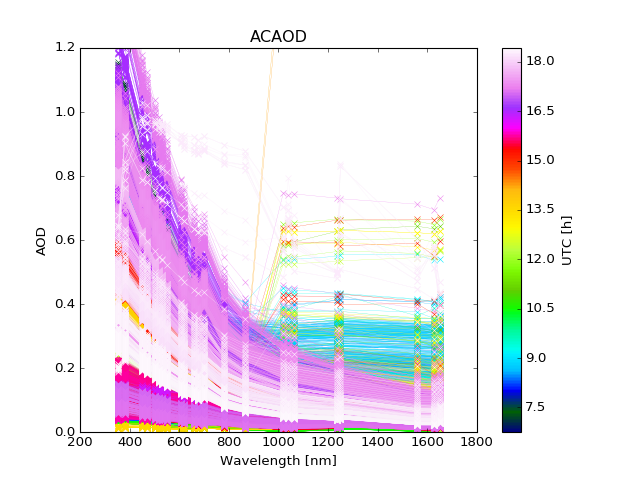

/usr/lib/python2.7/dist-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [152]:
plt.figure()
color.cycle_cmap(ns,cmap=plt.cm.gist_ncar,ax=plt.gca())

for i,u in enumerate(s['Start_UTC']):
    if s['fl_acaod'][i]:
        plt.plot(wvl,aods[i,:],'-x',lw=0.2)
        pbar.update(1)

plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.ylim([0,1.2])
plt.title('ACAOD')
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar)
scalarmap.set_array(s['Start_UTC'][s['fl_acaod']])
cba = plt.colorbar(scalarmap)
cba.set_label('UTC [h]')
#plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_all_ACAOD_spectra.png',
#            transparent=True,dpi=500)

In [153]:
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_all_ACAOD_spectra.png',
            transparent=True,dpi=500)

## ACAOD spectra, mean, median, std

In [29]:
iw = wvl!=700.0

In [27]:
meanaod = np.nanmean(aods[s['fl_acaod'],:],axis=0)
medianaod = np.nanmedian(aods[s['fl_acaod'],:],axis=0)
stdaod = np.nanstd(aods[s['fl_acaod'],:],axis=0)

In [28]:
meanuncaod = np.nanmean(uncaods[s['fl_acaod'],:],axis=0)

<IPython.core.display.Javascript object>


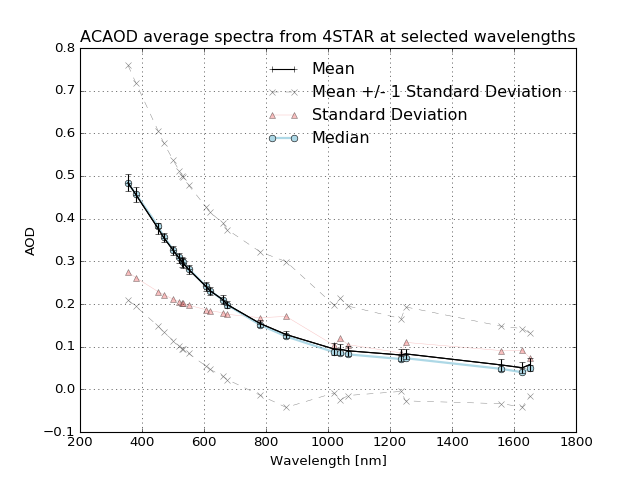

In [44]:
plt.figure()
plt.plot(wvl[iw],meanaod[iw],'k-+',label='Mean')
plt.errorbar(wvl[iw],meanaod[iw],yerr=meanuncaod[iw],color='k')
plt.plot(wvl[iw],meanaod[iw]+stdaod[iw],'--x',color='grey',lw=0.4,label='Mean +/- 1 Standard Deviation')
plt.plot(wvl[iw],stdaod[iw],'-^',lw=0.4,color='lightcoral',label='Standard Deviation',zorder=-2,alpha=0.5)
plt.plot(wvl[iw],meanaod[iw]-stdaod[iw],'--x',color='grey',lw=0.4)
plt.plot(wvl[iw],medianaod[iw],'-o',lw=2.0,color='lightblue',label='Median',zorder=-1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.title('ACAOD average spectra from 4STAR at selected wavelengths')
plt.grid()

plt.legend(frameon=False)
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_mean_ACAOD_spectra_less700.png',
            transparent=True,dpi=500)

In [326]:
mean_angs = -1.0*(np.log(meanaod[je])-np.log(meanaod[ja]))/(np.log(wvl[je])-np.log(wvl[ja]))
mean_angs

1.6701395558682541

In [548]:
wvl[[2,15]]

array([ 452.,  865.])

In [30]:
meanaod[[2,15]], medianaod[[2,15]],stdaod[[2,15]],meanuncaod[[2,15]]

(array([ 0.37696663,  0.12841721]),
 array([ 0.382,  0.124]),
 array([ 0.22885764,  0.17078396]),
 array([ 0.01392783,  0.00832643]))

## Get the Principal components from PCA

In [36]:
ivalid = np.all(np.isfinite(aods[s['fl_acaod'],:]),axis=1)
aods_valid = aods[s['fl_acaod'],:][ivalid,:]

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(aods_valid)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.explained_variance_ratio_[0]

0.94288041400834832

In [39]:
pca.explained_variance_ratio_[:]

array([  9.42880414e-01,   5.21505915e-02,   3.67501695e-03,
         3.73652473e-04,   2.10102818e-04,   1.81341338e-04,
         1.47360507e-04,   1.00963207e-04,   7.48187804e-05,
         6.09848580e-05,   4.01668080e-05,   3.48067648e-05,
         2.17758782e-05,   1.55285195e-05,   9.48126967e-06,
         8.48072931e-06,   4.77700344e-06,   3.82010740e-06,
         2.16474208e-06,   1.62473363e-06])

In [40]:
pca.components_.shape

(20, 24)

<IPython.core.display.Javascript object>


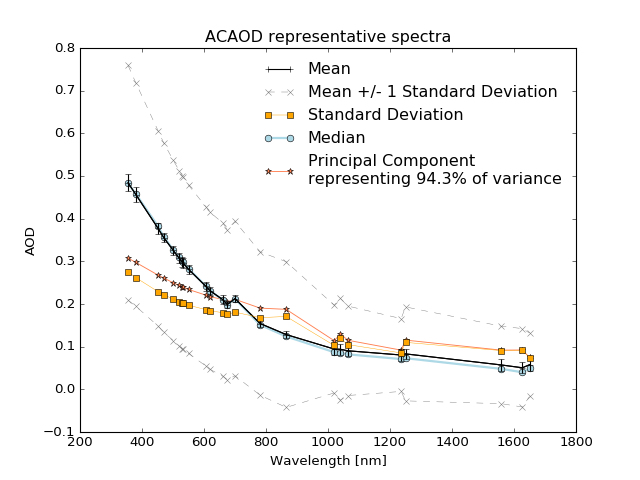

In [42]:
plt.figure()
plt.plot(wvl,meanaod,'k-+',label='Mean')
plt.errorbar(wvl,meanaod,yerr=meanuncaod,color='k')
plt.plot(wvl,meanaod+stdaod,'--x',color='grey',lw=0.4,label='Mean +/- 1 Standard Deviation')
plt.plot(wvl,meanaod-stdaod,'--x',color='grey',lw=0.4)
plt.plot(wvl,stdaod,'-s',color='orange',lw=0.4,label='Standard Deviation')
plt.plot(wvl,medianaod,'-o',lw=2.0,color='lightblue',label='Median',zorder=-1)
plt.plot(wvl,pca.components_[0,:],'-*',lw=0.8,color='coral',zorder=-2,
         label='Principal Component\nrepresenting {:2.1f}% of variance'.format(pca.explained_variance_ratio_[0]*100.0))
plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.title('ACAOD representative spectra')

plt.legend(frameon=False)
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_mean_pca_ACAOD_spectra.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


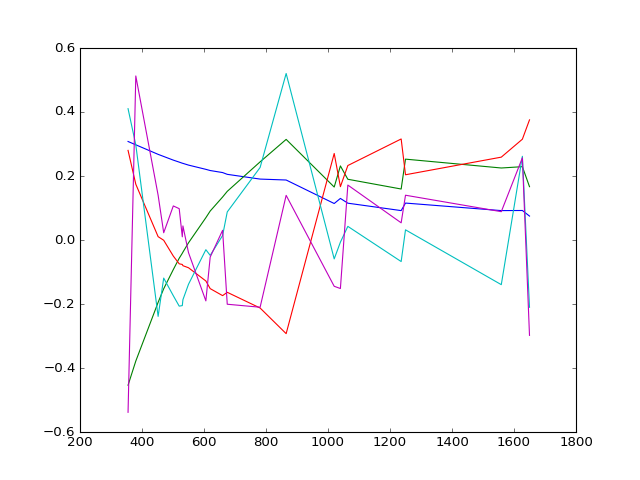

In [565]:
plt.figure()
plt.plot(wvl[iw],pca.components_[0,iw])
plt.plot(wvl[iw],pca.components_[1,iw])
plt.plot(wvl[iw],pca.components_[2,iw])
plt.plot(wvl[iw],pca.components_[3,iw])
plt.plot(wvl[iw],pca.components_[4,iw])


<IPython.core.display.Javascript object>


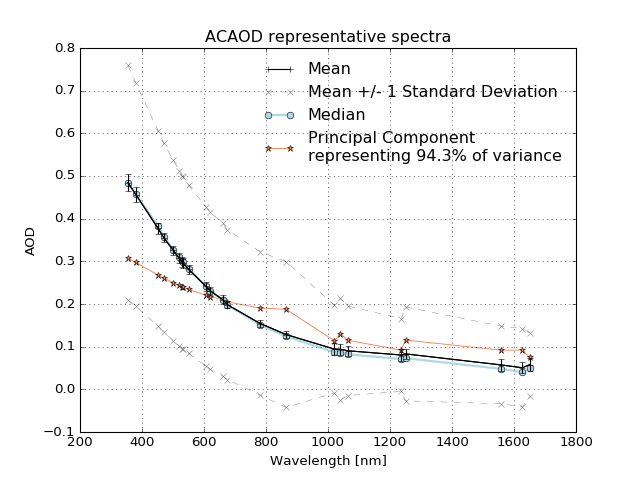

In [550]:
plt.figure()
plt.plot(wvl[iw],meanaod[iw],'k-+',label='Mean')
plt.errorbar(wvl[iw],meanaod[iw],yerr=meanuncaod[iw],color='k')
plt.plot(wvl[iw],meanaod[iw]+stdaod[iw],'--x',color='grey',lw=0.4,label='Mean +/- 1 Standard Deviation')
plt.plot(wvl[iw],meanaod[iw]-stdaod[iw],'--x',color='grey',lw=0.4)
plt.plot(wvl[iw],medianaod[iw],'-o',lw=2.0,color='lightblue',label='Median',zorder=-1)
plt.plot(wvl[iw],pca.components_[0,iw],'-*',lw=0.8,color='coral',zorder=-2,
         label='Principal Component\nrepresenting {:2.1f}% of variance'.format(pca.explained_variance_ratio_[0]*100.0))
plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.title('ACAOD representative spectra')
plt.grid()


plt.legend(frameon=False)
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_mean_pca_ACAOD_spectra_no700.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


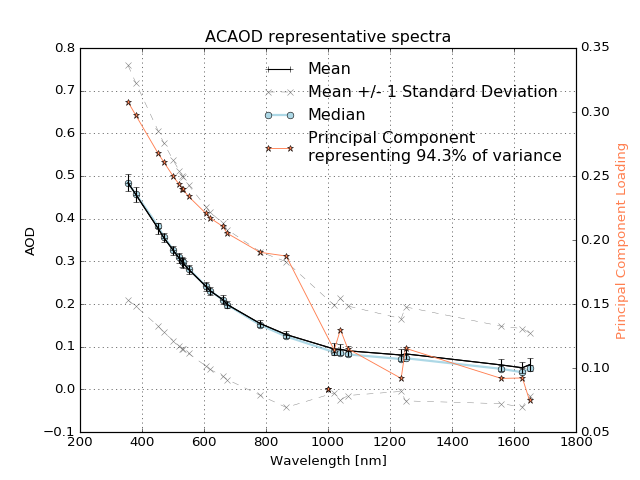

In [574]:
plt.figure()

plt.plot(wvl[iw],meanaod[iw],'k-+',label='Mean')
plt.errorbar(wvl[iw],meanaod[iw],yerr=meanuncaod[iw],color='k')
plt.plot(wvl[iw],meanaod[iw]+stdaod[iw],'--x',color='grey',lw=0.4,label='Mean +/- 1 Standard Deviation')
plt.plot(wvl[iw],meanaod[iw]-stdaod[iw],'--x',color='grey',lw=0.4)
plt.plot(wvl[iw],medianaod[iw],'-o',lw=2.0,color='lightblue',label='Median',zorder=-1)


plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.title('ACAOD representative spectra')
plt.grid()
plt.plot([1000,1000],[0,0],'-*',lw=0.8,color='coral',
        label='Principal Component\nrepresenting {:2.1f}% of variance'.format(pca.explained_variance_ratio_[0]*100.0))
plt.legend(frameon=False)


ax2 = plt.twinx(plt.gca())
ax2.plot(wvl[iw],pca.components_[0,iw],'-*',lw=0.8,color='coral',zorder=-2,
         label='Principal Component\nrepresenting {:2.1f}% of variance'.format(pca.explained_variance_ratio_[0]*100.0))

ax2.set_ylabel('Principal Component Loading',color='coral')


plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_mean_pca_ACAOD_spectra_no700_twinax.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


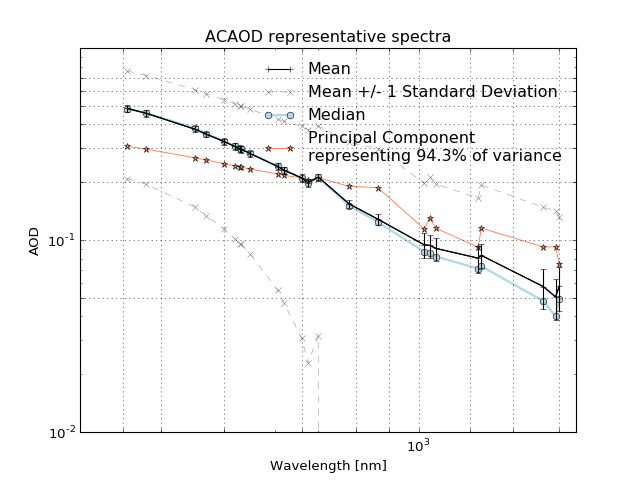

In [254]:
plt.figure()
plt.plot(wvl,meanaod,'k-+',label='Mean')
plt.errorbar(wvl,meanaod,yerr=meanuncaod,color='k')
plt.plot(wvl,meanaod+stdaod,'--x',color='grey',lw=0.4,label='Mean +/- 1 Standard Deviation')
plt.plot(wvl,meanaod-stdaod,'--x',color='grey',lw=0.4)
plt.plot(wvl,medianaod,'-o',lw=2.0,color='lightblue',label='Median',zorder=-1)
plt.plot(wvl,pca.components_[0,:],'-*',lw=0.8,color='coral',zorder=-2,
         label='Principal Component\nrepresenting {:2.1f}% of variance'.format(pca.explained_variance_ratio_[0]*100.0))
plt.xlabel('Wavelength [nm]')
plt.ylabel('AOD')
plt.title('ACAOD representative spectra')
plt.yscale('log')
plt.xscale('log')
plt.xlim(300,1750)
plt.xticks([350,400,500,660,800,900,1000,1200,1400,1650])
#plt.xticklabel([350,400,500,660,800,900,1000,1200,1400,1650])
plt.yticks([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
#plt.yticklabel([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.grid()

plt.legend(frameon=False)
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_mean_pca_ACAOD_spectra_loglog.png',
            transparent=True,dpi=500)

In [551]:
pca_angs = -1.0*(np.log(pca.components_[0,je])-np.log(pca.components_[0,ja]))/(np.log(wvl[je])-np.log(wvl[ja]))
pca_angs

0.54266286607575376

# Get the spacing and altitudes of gap from ACAOD altitudes and distances

In [18]:
s['fl_acaod_noQA'] = s['flag_acaod']==1

In [19]:
ii_flacaod = np.where(s['fl_acaod_noQA'])[0] 
ii_flacaod[0]

74369

In [20]:
ii_flacaod_0_5 = np.where(s['fl_acaod_noQA'] & (s['Longitude']>=0) & (s['Longitude']<5.0))[0] 
ii_flacaod_0_5[0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


85259

In [21]:
ii_flacaod_5_10 = np.where(s['fl_acaod_noQA'] & (s['Longitude']>=5) & (s['Longitude']<10.0))[0] 
ii_flacaod_5_10[0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


95565

In [22]:
ii_flacaod_10_15 = np.where(s['fl_acaod_noQA'] & (s['Longitude']>=10) & (s['Longitude']<15.0))[0] 
ii_flacaod_10_15[0]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
disc_flacaod = np.where(np.diff(ii_flacaod,1)>1)[0]
disc_flacaod_long = np.where(np.diff(ii_flacaod,1)>150)[0]
disc_flacaod_0_5 = np.where(np.diff(ii_flacaod_0_5,1)>150)[0]
disc_flacaod_5_10 = np.where(np.diff(ii_flacaod_5_10,1)>150)[0]
disc_flacaod_10_15 = np.where(np.diff(ii_flacaod_10_15,1)>150)[0]

<IPython.core.display.Javascript object>


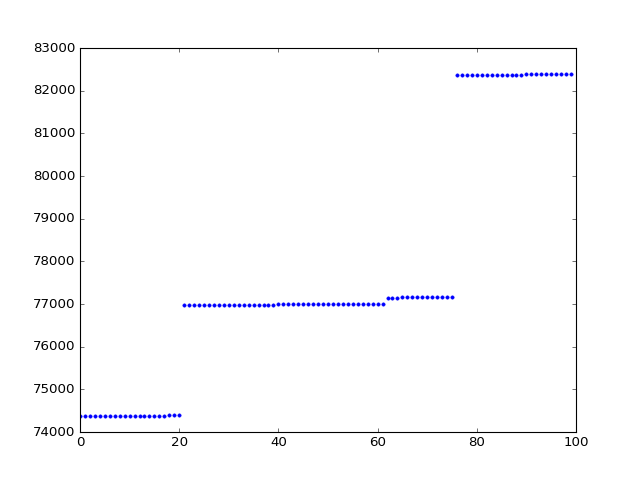

IndexError: index 106 is out of bounds for axis 1 with size 100

In [24]:
plt.figure()
plt.plot(ii_flacaod[0:100],'.')
plt.plot(np.arange(100)[disc_flacaod[0:6]],ii_flacaod[0:100][disc_flacaod[0:6]],'rx')
plt.plot(np.arange(100)[disc_flacaod[0:6]+1],ii_flacaod[0:100][disc_flacaod[0:6]+1],'go')


In [25]:
discontinuity_istart =  ii_flacaod[np.append(0,disc_flacaod[:-1]+1)]
discontinuity_iend =  ii_flacaod[disc_flacaod]

In [26]:
discontinuity_istart_long =  ii_flacaod[np.append(0,disc_flacaod_long[:-1]+1)]
discontinuity_iend_long =  ii_flacaod[disc_flacaod_long]

In [27]:
discontinuity_istart_0_5 =  ii_flacaod_0_5[np.append(0,disc_flacaod_0_5[:-1]+1)]
discontinuity_iend_0_5 =  ii_flacaod_0_5[disc_flacaod_0_5]
discontinuity_istart_5_10 =  ii_flacaod_5_10[np.append(0,disc_flacaod_5_10[:-1]+1)]
discontinuity_iend_5_10 =  ii_flacaod_5_10[disc_flacaod_5_10]
discontinuity_istart_10_15 =  ii_flacaod_10_15[np.append(0,disc_flacaod_10_15[:-1]+1)]
discontinuity_iend_10_15 =  ii_flacaod_10_15[disc_flacaod_10_15]

IndexError: index 0 is out of bounds for axis 1 with size 0

In [28]:
delta_alt,delta_lon,delta_lat = [],[],[]
for i,start in enumerate(discontinuity_istart):
    try:
        ma = np.nanmax(s['GPS_Alt'][start:discontinuity_iend[i]])
        mi = np.nanmin(s['GPS_Alt'][start:discontinuity_iend[i]])
        delta_alt.append(ma-mi)
        delta_lon.append(np.nanmean(s['Longitude'][start:discontinuity_iend[i]]))
        delta_lat.append(np.nanmean(s['Latitude'][start:discontinuity_iend[i]]))
    except:
        pass
delta_alt = np.array(delta_alt)
delta_lon = np.array(delta_lon)
delta_lat = np.array(delta_lat)


In [29]:
ldelta_alt,ldelta_lon,ldelta_lat,ldelta_lon_days,ldelta_lat_days = [],[],[],[],[]
for i,start in enumerate(discontinuity_istart_long):
    try:
        ma = np.nanmax(s['GPS_Alt'][start:discontinuity_iend_long[i]])
        mi = np.nanmin(s['GPS_Alt'][start:discontinuity_iend_long[i]])
        ldelta_alt.append(ma-mi)
        ldelta_lon.append(np.nanmean(s['Longitude'][start:discontinuity_iend_long[i]]))
        ldelta_lat.append(np.nanmean(s['Latitude'][start:discontinuity_iend_long[i]]))
        ldelta_lat_days.append(np.unique(s['days'][start:discontinuity_iend_long[i]]))
        ldelta_lon_days.append(np.unique(s['days'][start:discontinuity_iend_long[i]]))
    except:
        pass
ldelta_alt = np.array(ldelta_alt)
ldelta_lon = np.array(ldelta_lon)
ldelta_lat = np.array(ldelta_lat)
ldelta_lat_days = np.array(ldelta_lat_days)
ldelta_lon_days = np.array(ldelta_lon_days)

In [30]:
ldelta_alt.shape

(110,)

In [76]:
delta_alt1,delta_lon1,delta_lat1 = [],[],[]
for i,start in enumerate(discontinuity_istart_0_5):
    try:
        ma = np.nanmax(s['GPS_Alt'][start:discontinuity_iend_0_5[i]])
        mi = np.nanmin(s['GPS_Alt'][start:discontinuity_iend_0_5[i]])
        delta_alt1.append(ma-mi)
        delta_lon1.append(np.nanmean(s['Longitude'][start:discontinuity_iend_0_5[i]]))
        delta_lat1.append(np.nanmean(s['Latitude'][start:discontinuity_iend_0_5[i]]))
    except:
        pass
delta_alt1 = np.array(delta_alt1)
delta_lon1 = np.array(delta_lon1)
delta_lat1 = np.array(delta_lat1)

delta_alt2,delta_lon2,delta_lat2 = [],[],[]
for i,start in enumerate(discontinuity_istart_5_10):
    try:
        ma = np.nanmax(s['GPS_Alt'][start:discontinuity_iend_5_10[i]])
        mi = np.nanmin(s['GPS_Alt'][start:discontinuity_iend_5_10[i]])
        delta_alt2.append(ma-mi)
        delta_lon2.append(np.nanmean(s['Longitude'][start:discontinuity_iend_5_10[i]]))
        delta_lat2.append(np.nanmean(s['Latitude'][start:discontinuity_iend_5_10[i]]))
    except:
        pass
delta_alt2 = np.array(delta_alt2)
delta_lon2 = np.array(delta_lon2)
delta_lat2 = np.array(delta_lat2)

delta_alt3,delta_lon3,delta_lat3 = [],[],[]
for i,start in enumerate(discontinuity_istart_10_15):
    try:
        ma = np.nanmax(s['GPS_Alt'][start:discontinuity_iend_10_15[i]])
        mi = np.nanmin(s['GPS_Alt'][start:discontinuity_iend_10_15[i]])
        delta_alt3.append(ma-mi)
        delta_lon3.append(np.nanmean(s['Longitude'][start:discontinuity_iend_10_15[i]]))
        delta_lat3.append(np.nanmean(s['Latitude'][start:discontinuity_iend_10_15[i]]))
    except:
        pass
delta_alt3 = np.array(delta_alt3)
delta_lon3 = np.array(delta_lon3)
delta_lat3 = np.array(delta_lat3)


In [77]:
np.nanmax(delta_alt),np.nanmax(ldelta_alt),np.nanmax(delta_alt1),np.nanmax(delta_alt2),np.nanmax(delta_alt3)

(3583.2999999999997,
 3829.8999999999996,
 3175.2000000000003,
 3651.0999999999999,
 3583.2999999999997)

In [91]:
float(len(ldelta_alt[ldelta_alt<360.0]))*100.0/len(ldelta_alt)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


47.82608695652174

In [78]:
delta_alt

array([  1.77400000e+02,   4.46000000e+01,   1.34900000e+02,
         1.83000000e+01,   6.93000000e+01,   5.45000000e+01,
         3.04600000e+02,   5.38000000e+01,   6.65000000e+02,
         7.00000000e+00,   1.00000000e+00,   4.92900000e+02,
         4.90000000e+00,   2.19000000e+01,   0.00000000e+00,
         4.06700000e+02,   4.49000000e+01,   1.82800000e+02,
         8.00000000e+00,   0.00000000e+00,   1.01000000e+01,
         0.00000000e+00,   4.94000000e+01,   0.00000000e+00,
         4.50000000e+00,   2.50000000e+01,   5.40000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.50000000e+00,
         6.00000000e+00,   0.00000000e+00,   1.43100000e+02,
         8.70000000e+00,   3.00000000e+00,   2.50100000e+02,
         1.08600000e+02,   0.00000000e+00,   4.60400000e+02,
         2.86000000e+01,   1.51400000e+02,   6.59000000e+01,
         4.94500000e+02,   4.23900000e+02,   9.10000000e+00,
         2.22000000e+01,

<IPython.core.display.Javascript object>


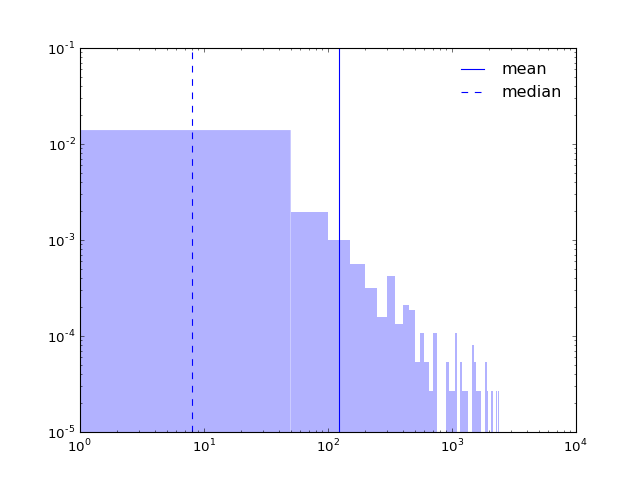

In [318]:
plt.figure()
plt.hist(delta_alt,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3)
#plt.hist(delta_alt_all,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3)
plt.yscale('log')
plt.xscale('log')
plt.axvline(np.nanmean(delta_alt_all),label='mean')
plt.axvline(np.nanmedian(delta_alt_all),label='median',ls='--')
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


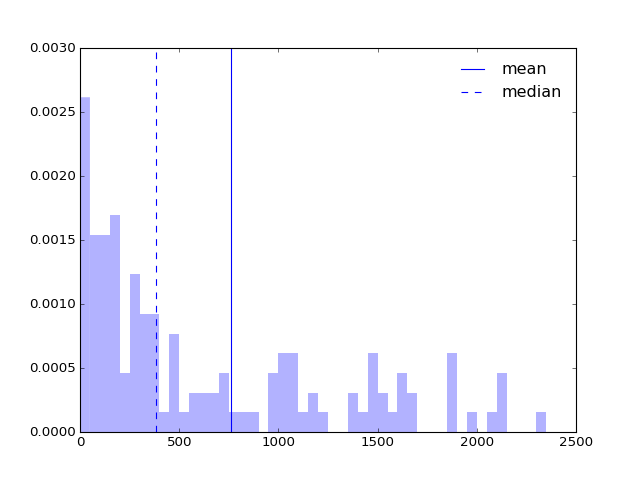

In [417]:
plt.figure()
plt.hist(ldelta_alt,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3)
#plt.hist(delta_alt_all,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3)
#plt.yscale('log')
#plt.xscale('log')
plt.axvline(np.nanmean(ldelta_alt),label='mean')
plt.axvline(np.nanmedian(ldelta_alt),label='median',ls='--')
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


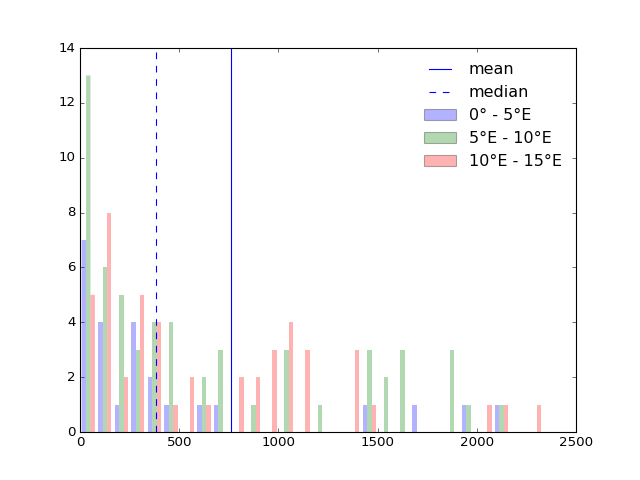

In [519]:
plt.figure()
#plt.hist(ldelta_alt,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3,label='All')
#plt.hist(delta_alt1,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3,label=u'0° - 5°E')
#plt.hist(delta_alt2,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3,label=u'5°E - 10°E')
#plt.hist(delta_alt3,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3,label=u'10°E - 15°E')
plt.hist([delta_alt1,delta_alt2,delta_alt3],bins=30,range=[0,2500],stacked=False,normed=False,edgecolor='None',alpha=0.3,
         label=[u'0° - 5°E',u'5°E - 10°E',u'10°E - 15°E'])

#plt.hist(delta_alt_all,bins=50,range=[0,2500],normed=True,edgecolor='None',alpha=0.3)
#plt.yscale('log')
#plt.xscale('log')
plt.axvline(np.nanmean(ldelta_alt),label='mean')
plt.axvline(np.nanmedian(ldelta_alt),label='median',ls='--')
plt.legend(frameon=False)

## make a box plot of the altitude differences in gap vs. longitude

In [79]:
delta_lon

array([-14.17784003,  -6.1307392 ,  -5.60060037,  14.67072067,
        14.65355604,  14.59350803,  11.68960699,  10.89077538,
        10.56253319,  10.29747931,  10.22795306,   9.82832694,
         9.35367652,   9.39200548,   9.292746  ,   6.49149798,
         2.57219704,   2.57995406,   2.5698641 ,   3.5540633 ,
         3.56465422,   3.6935111 ,   7.0471871 ,   7.0566105 ,
         7.09136035,   7.06775669,   7.05057145,   6.89140784,
         6.826928  ,   6.8222883 ,   6.80782907,   6.7801069 ,
         6.79481383,   6.82349707,   6.895687  ,   6.99182797,
         8.05051257,   8.20280525,   8.28128899,  14.57592483,
        14.5930106 ,  14.63088966,  14.67589163,  14.66214215,
        14.34794626,  10.00002486,  10.0000804 ,   9.9998    ,
         9.9998    ,   9.99922916,  10.00039038,  10.00000351,
         9.99997548,   9.99989909,  10.00013546,   9.99956864,
         9.9997883 ,   9.99963111,  10.00023924,  10.00038875,
        10.00001147,  10.03401712,  10.0447986 ,  10.03

In [80]:
numlon,binlon = np.histogram(delta_lon,range=(0,16))

In [81]:
binlon

array([  0. ,   1.6,   3.2,   4.8,   6.4,   8. ,   9.6,  11.2,  12.8,
        14.4,  16. ])

In [82]:
bin_alt,bin_lon = [],[]
for i in xrange(16):
    fllon = (delta_lon>=i) & (delta_lon<(i+1.0))
    bin_alt.append(delta_alt[fllon])
    bin_lon.append(np.mean([i,i+1.0]))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
lbin_alt,lbin_lon,lbin_ndays = [],[],[]
for i in xrange(16):
    fllon = (ldelta_lon>=i) & (ldelta_lon<(i+1.0))
    lbin_alt.append(ldelta_alt[fllon])
    lbin_lon.append(np.mean([i,(i+1.0)]))
    try:
        lbin_ndays.append(len(np.unique(np.hstack(ldelta_lon_days[fllon]))))
    except:
        lbin_ndays.append(0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
bin_alt

[array([ 381.7,  111.3,   61.2,   17.2,    0. ,  266.6,    1. ,   12.6,
          20.6,    5. ,    7. ]),
 array([  17. ,    7. ,    0. ,    0. ,  145. ,   55. ,  104. ,  230.4,
         117.5]),
 array([  44.9,  182.8,    8. ,   41. ,   35.6,    7. ,    9.2,  948.5,
          13.7,   83.8,   12.5,  185.7,    1.1,  321. ,   99.6,    0. ,
         117.8]),
 array([  0.00000000e+00,   1.01000000e+01,   0.00000000e+00,
          1.30500000e+02,   2.72000000e+01,   5.50000000e+01,
          0.00000000e+00,   7.00000000e-01,   4.00000000e+00,
          1.80000000e+01,   4.13000000e+01,   0.00000000e+00,
          1.90000000e+01,   3.99400000e+02,   0.00000000e+00,
          1.26900000e+02,   1.09200000e+02,   1.06690000e+03,
          4.74100000e+02,   1.19170000e+03,   1.49290000e+03]),
 array([   0. ,  525.5,   72. ,  229.8,  447.5,  181.1,    7.3,    6.3,
           4. ,    3. ,    0. ,   14. ,    4.4,    6. ,    1.4,    0. ,
           2.7,    5.8,   29.8,   18.3,  344.8,  620.8,  117.6

<IPython.core.display.Javascript object>


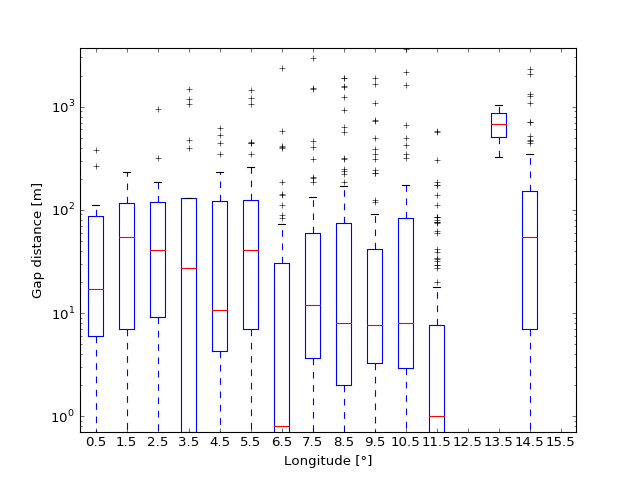

In [85]:
plt.figure()
plt.boxplot(bin_alt,positions=bin_lon)
plt.yscale('log')
plt.ylim(0,3700)
plt.ylabel('Gap distance [m]')
plt.xlabel(u'Longitude [°]')

<IPython.core.display.Javascript object>


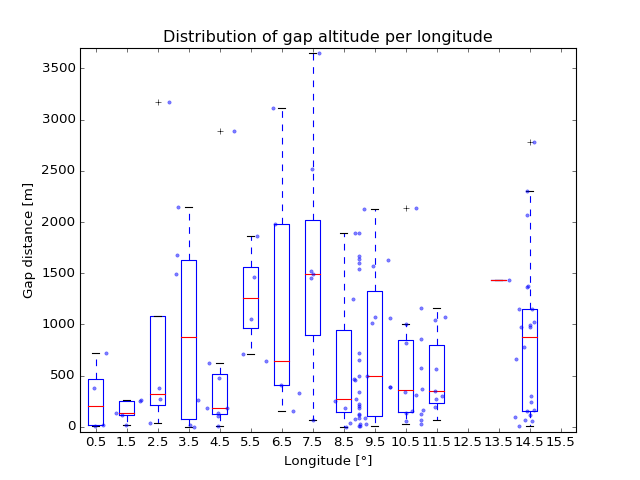

In [87]:
plt.figure()
plt.boxplot(lbin_alt,positions=lbin_lon)
plt.plot(ldelta_lon,ldelta_alt,'.',alpha=0.5)
#plt.yscale('log')
plt.ylim(-50,3700)
plt.ylabel('Gap distance [m]')
plt.xlabel(u'Longitude [°]')
plt.title('Distribution of gap altitude per longitude')
#plt.savefig()

<IPython.core.display.Javascript object>


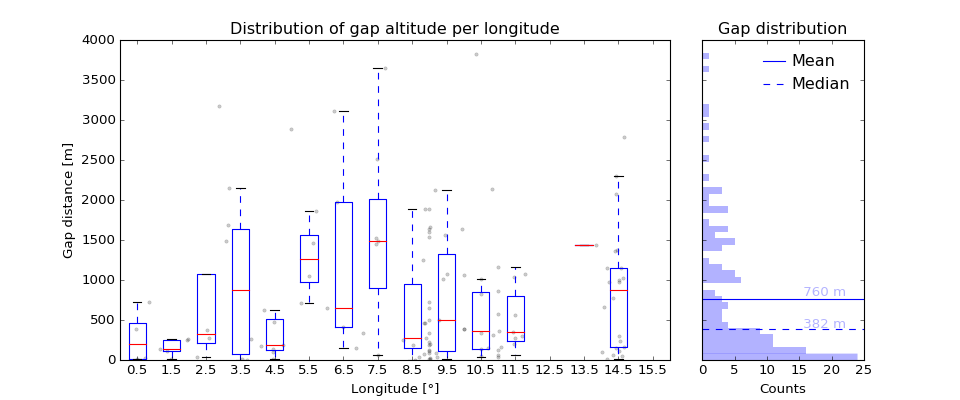

In [420]:
plt.figure(figsize=(12,5))
ax = plt.subplot2grid((1,4),(0,0),colspan=3)

ax.boxplot(lbin_alt,positions=lbin_lon,showfliers=False)
ax.plot(ldelta_lon,ldelta_alt,'k.',alpha=0.2,zorder=-1)
#plt.yscale('log')
ax.set_ylim(-50,3700)
ax.set_ylabel('Gap distance [m]')
ax.set_xlabel(u'Longitude [°]')
#plt.xticks(rotation=45,ha="right") 
ax.set_title('Distribution of gap altitude per longitude')

ax2 = plt.subplot2grid((1,4),(0,3),sharey=ax)

ax2.hist(ldelta_alt,bins=50,range=[0,4000],normed=False,edgecolor='None',alpha=0.3,orientation='horizontal')
ax2.axhline(np.nanmean(ldelta_alt),label='Mean')
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.axhline(np.nanmedian(ldelta_alt),label='Median',ls='--')
ax2.annotate('{:4.0f} m'.format(np.nanmean(ldelta_alt)),(15,np.nanmean(ldelta_alt)*1.05),color='b',alpha=0.3)
ax2.annotate('{:4.0f} m'.format(np.nanmedian(ldelta_alt)),(15,np.nanmedian(ldelta_alt)*1.05),color='b',alpha=0.3)

ax2.set_title('Gap distribution')
#plt.xticks(rotation=45,ha="right")
ax2.set_xlabel('Counts')
plt.legend(frameon=False,handletextpad=0.05)

#plt.tight_layout()
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_gap_distribution.png',
            transparent=True,dpi=500)

<IPython.core.display.Javascript object>


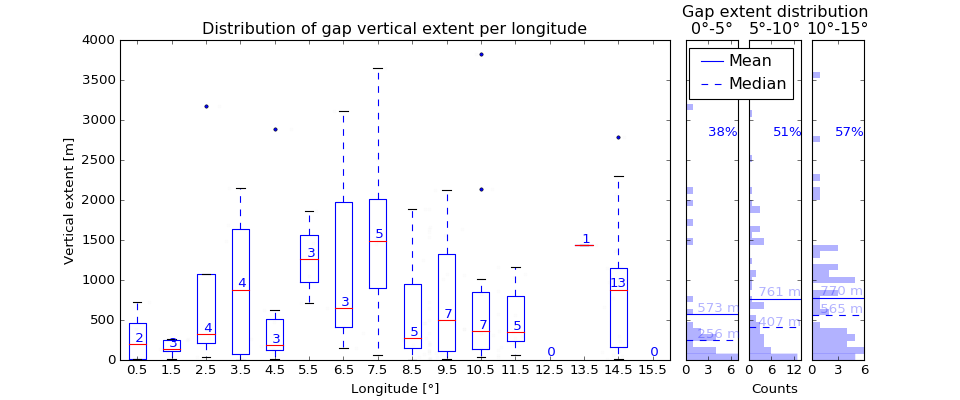

In [97]:
plt.figure(figsize=(12,5))
ax = plt.subplot2grid((1,4),(0,0),colspan=3)

bow = ax.boxplot(lbin_alt,positions=lbin_lon,showfliers=True,sym='.')
ax.plot(ldelta_lon,ldelta_alt,'k.',alpha=0.01,zorder=-1)
for j,nn in enumerate(lbin_ndays):
    if nn>0:
        ax.text(lbin_lon[j],np.nanmax(bow['medians'][j].get_data()[1])+30,'{:2.0f}'.format(nn),color='blue',horizontalalignment='center')
    else:
        ax.text(lbin_lon[j],50,'{:2.0f}'.format(nn),color='blue',horizontalalignment='center')
#plt.yscale('log')
ax.set_ylim(-50,3700)
ax.set_ylabel('Vertical extent [m]')
ax.set_xlabel(u'Longitude [°]')
#plt.xticks(rotation=45,ha="right") 
ax.set_title('Distribution of gap vertical extent per longitude')

ax2 = plt.subplot2grid((1,12),(0,9),sharey=ax)
ax2.hist(delta_alt1,bins=50,range=[0,4000],normed=False,edgecolor='None',alpha=0.3,orientation='horizontal')
ax2.axhline(np.nanmean(delta_alt1),label='Mean')
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.axhline(np.nanmedian(delta_alt1),label='Median',ls='--')
ax2.annotate('{:4.0f} m'.format(np.nanmean(delta_alt1)),(1,np.nanmean(delta_alt1)*1.05),color='b',alpha=0.3)
ax2.annotate('{:4.0f} m'.format(np.nanmedian(delta_alt1)),(1,np.nanmedian(delta_alt1)*1.05),color='b',alpha=0.3)
ax2.annotate('{:2.0f}%'.format(float(len(delta_alt1[delta_alt1>360.0]))*100.0/len(delta_alt1)),(3,2800.0),color='b')
ax2.set_title(u'0°-5°')
ax2.set_xticks([0,3,6])
#plt.xticks(rotation=45,ha="right")
#ax2.set_xlabel('Counts')
#plt.legend(frameon=False,handletextpad=0.05)


ax3 = plt.subplot2grid((1,12),(0,10),sharey=ax)
ax3.hist(delta_alt2,bins=50,range=[0,4000],normed=False,edgecolor='None',alpha=0.3,orientation='horizontal')
ax3.axhline(np.nanmean(delta_alt2),label='Mean')
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.axhline(np.nanmedian(delta_alt2),label='Median',ls='--')
ax3.annotate('{:4.0f} m'.format(np.nanmean(delta_alt2)),(1.5,np.nanmean(delta_alt2)*1.05),color='b',alpha=0.3)
ax3.annotate('{:4.0f} m'.format(np.nanmedian(delta_alt2)),(1.5,np.nanmedian(delta_alt2)*1.05),color='b',alpha=0.3)
ax3.annotate('{:2.0f}%'.format(float(len(delta_alt2[delta_alt2>360.0]))*100.0/len(delta_alt2)),(6.5,2800.0),color='b')
ax3.set_title('Gap extent distribution\n'+u'5°-10°')
#plt.xticks(rotation=45,ha="right")
ax3.set_xlabel('Counts')
ax3.set_xticks([0,6,12])
plt.legend(frameon=True,handletextpad=0.02)#,ncol=2,columnspacing=0.2,loc=1)

ax4 = plt.subplot2grid((1,12),(0,11),sharey=ax)
ax4.hist(delta_alt3,bins=50,range=[0,4000],normed=False,edgecolor='None',alpha=0.3,orientation='horizontal')
ax4.axhline(np.nanmean(delta_alt3),label='Mean')
plt.setp(ax4.get_yticklabels(), visible=False)
ax4.axhline(np.nanmedian(delta_alt3),label='Median',ls='--')
ax4.annotate('{:4.0f} m'.format(np.nanmean(delta_alt3)),(0.5,np.nanmean(delta_alt3)*1.05),color='b',alpha=0.3)
ax4.annotate('{:4.0f} m'.format(np.nanmedian(delta_alt3)),(0.5,np.nanmedian(delta_alt3)*1.05),color='b',alpha=0.3)
ax4.annotate('{:2.0f}%'.format(float(len(delta_alt3[delta_alt3>360.0]))*100.0/len(delta_alt3)),(2.7,2800.0),color='b')
ax4.set_title(u'10°-15°')
ax4.set_xticks([0,3,6])
#ax4.legend(frameon=True,handletextpad=0.02,loc=1)
#plt.xticks(rotation=45,ha="right")
#ax4.set_xlabel('Counts')
#plt.legend(frameon=False,handletextpad=0.05)

#plt.tight_layout()
plt.savefig(fp+'plot_v2/ORACLES2016_4STAR_gap_distribution_3sub.png',
            transparent=True,dpi=500)

# Calculate the fine mode and coarse mode aod

In [555]:
dd = su.sda(aods,wvl)

HBox(children=(IntProgress(value=0, max=483694), HTML(value=u'')))

In [556]:
dd.keys()

['tauc', 'alphap', 'tauf', 'tau', 'poly', 'alpha']

<IPython.core.display.Javascript object>


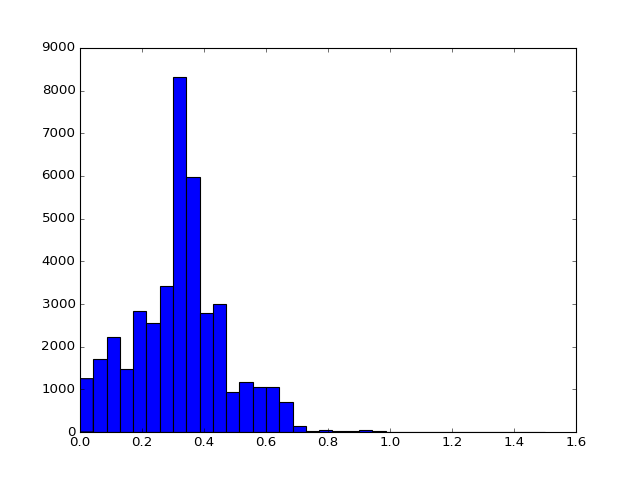

(array([  1.25000000e+03,   1.70400000e+03,   2.23600000e+03,
          1.47700000e+03,   2.83000000e+03,   2.54600000e+03,
          3.42300000e+03,   8.32300000e+03,   5.97000000e+03,
          2.79000000e+03,   2.99600000e+03,   9.31000000e+02,
          1.17700000e+03,   1.05500000e+03,   1.04400000e+03,
          6.93000000e+02,   1.33000000e+02,   2.20000000e+01,
          4.00000000e+01,   2.00000000e+01,   1.60000000e+01,
          5.10000000e+01,   3.20000000e+01,   5.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 0.        ,  0.04285714,  0.08571429,  0.12857143,  0.17142857,
         0.21428571,  0.25714286,  0.3       ,  0.34285714,  0.38571429,
         0.42857143,  0.47142857,  0.51428571,  0.55714286,  0.6       ,
         0.64285714,  0.68571429,  0.72857143,  0.771

In [563]:
plt.figure()
plt.hist(dd['tauc'][s['fl_acaod']],range=[0,1.5],bins=35)

<IPython.core.display.Javascript object>


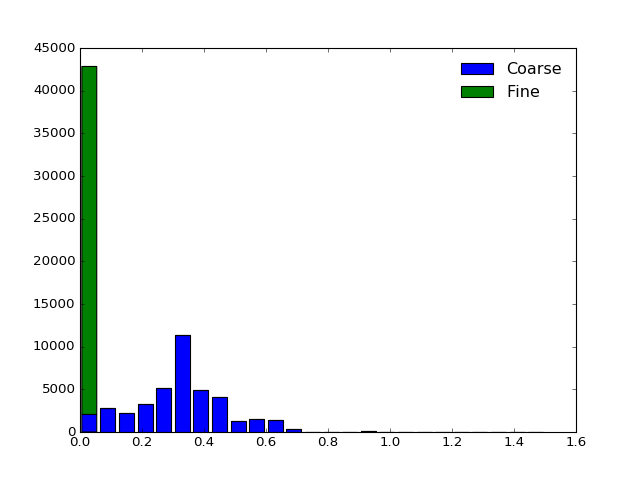

In [560]:
plt.figure()
plt.hist([dd['tauc'][s['fl_acaod']],dd['tauf'][s['fl_acaod']]],bins=25,range=(0,1.5),stacked=True,label=['Coarse','Fine'])
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


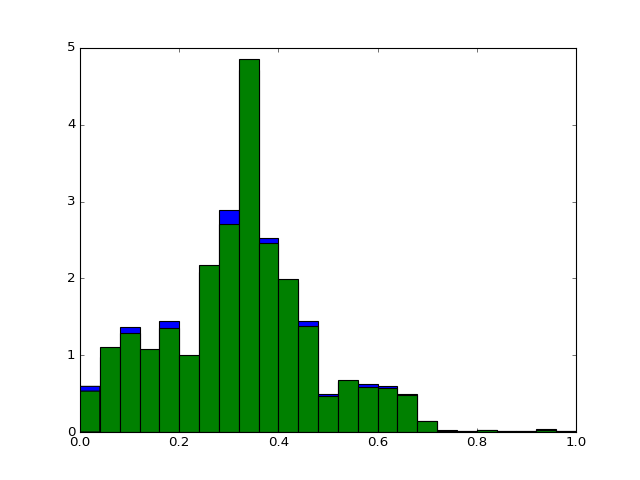

(array([ 0.53236694,  1.10479798,  1.29115676,  1.0841589 ,  1.35003885,
         1.00281663,  2.17681624,  2.70371989,  4.85686189,  2.46272824,
         1.99349262,  1.38039044,  0.46377234,  0.68291084,  0.58275058,
         0.57668026,  0.48501845,  0.14325952,  0.01942502,  0.01638986,
         0.02246018,  0.00849845,  0.01456876,  0.03095862,  0.01396173]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 25 Patch objects>)

In [558]:
plt.figure()
#plt.hist(dd['tauc'][s['fl_acaod']],bins=25,range=(0,5.0),normed=True)
#plt.hist(dd['tauf'][s['fl_acaod']],bins=25,range=(0,5.0),normed=True)
plt.hist(dd['tau'][s['fl_acaod']],bins=25,range=(0,1.0),normed=True)
plt.hist(aods[s['fl_acaod'],4],bins=25,range=(0,1.0),normed=True)